# DEBUT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
import statsmodels.api as sm
import scipy.stats as st
import missingno as msno
from statistics import mean, stdev

from sklearn.dummy import DummyRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn import neighbors
from sklearn import linear_model
from sklearn import ensemble
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap

# Suppress FutureWarnings
#import warnings
#warnings.filterwarnings('ignore', category=FutureWarning)

data = pd.read_csv('P4-cleaned.csv')

data.shape

(1526, 25)

In [2]:
data.head()

,BuildingType,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),PercentagePropertyGFABuildings,...,SecondLargestPropertyUseTypeGFAPourcentage,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFAPourcentage,ENERGYSTARScore,PercentageSteamUse(kBtu),PercentageElectricity(kBtu),SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,DOWNTOWN,89,1,12,88434,0,88434,100.0,...,NaN,NaN,NaN,60.0,27.0,53.0,7456910.0,84.300003,249.98,2.83
1,NonResidential,Hotel,DOWNTOWN,20,1,11,103566,15064,88502,85.0,...,15.0,Restaurant,4.0,61.0,0.0,37.0,8664479.0,97.900002,295.86,2.86
2,NonResidential,Hotel,DOWNTOWN,47,1,41,956110,196718,759392,79.0,...,NaN,NaN,NaN,43.0,29.0,67.0,73937112.0,97.699997,2089.28,2.19
3,NonResidential,Hotel,DOWNTOWN,90,1,10,61320,0,61320,100.0,...,NaN,NaN,NaN,56.0,32.0,40.0,6946800.5,113.300003,286.43,4.67
4,NonResidential,Hotel,DOWNTOWN,36,1,18,175580,62000,113580,65.0,...,39.0,Swimming Pool,0.0,75.0,0.0,37.0,14656503.0,118.699997,505.01,2.88


In [3]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'BuildingAge',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'PercentagePropertyGFABuildings', 'GFAperBuilding', 'GFAperFloor',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
       'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFAPourcentage',
       'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFAPourcentage', 'ENERGYSTARScore',
       'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [4]:
data.describe()

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),PercentagePropertyGFABuildings,GFAperBuilding,GFAperFloor,LargestPropertyUseTypeGFAPourcentage,SecondLargestPropertyUseTypeGFAPourcentage,ThirdLargestPropertyUseTypeGFAPourcentage,ENERGYSTARScore,PercentageSteamUse(kBtu),PercentageElectricity(kBtu),SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
count,1526.000000,1526.000000,1526.000000,1.526000e+03,1526.000000,1.526000e+03,1526.000000,1.526000e+03,1.526000e+03,1526.000000,828.000000,338.000000,985.000000,1526.000000,1526.000000,1.526000e+03,1526.000000,1526.000000,1526.000000
mean,54.443644,1.142857,4.208388,1.148438e+05,13720.039974,1.011238e+05,93.538663,9.496000e+04,2.954299e+04,86.433814,23.913043,10.047337,63.481218,2.103539,67.493447,8.520320e+06,78.148886,187.339993,1.677870
std,32.777948,1.187050,6.279278,1.971065e+05,43780.809950,1.748421e+05,14.347107,1.633201e+05,4.517597e+04,31.217154,17.219956,9.932598,28.882927,8.791413,27.002895,2.291256e+07,76.441349,732.444437,2.421649
min,1.000000,1.000000,1.000000,1.128500e+04,0.000000,3.636000e+03,10.000000,3.636000e+03,1.433000e+03,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.811420e+04,1.500000,0.000000,0.000000
25%,28.000000,1.000000,1.000000,2.881100e+04,0.000000,2.791425e+04,100.000000,2.728700e+04,1.174325e+04,68.000000,11.000000,3.000000,43.000000,0.000000,46.000000,1.337961e+06,37.299999,20.505000,0.360000
50%,51.000000,1.000000,2.000000,4.801300e+04,0.000000,4.606350e+04,100.000000,4.476500e+04,2.000000e+04,94.000000,23.000000,7.000000,71.000000,0.000000,68.000000,2.831452e+06,56.350000,49.940000,0.890000
75%,86.000000,1.000000,4.000000,1.060308e+05,0.000000,9.485325e+04,100.000000,9.039575e+04,3.110400e+04,100.000000,34.000000,15.000000,88.000000,0.000000,95.000000,7.570002e+06,88.300003,147.105000,1.980000
max,116.000000,27.000000,76.000000,2.200000e+06,512608.000000,2.200000e+06,100.000000,2.200000e+06,1.100000e+06,643.000000,145.000000,93.000000,100.000000,65.000000,104.000000,4.716139e+08,834.400024,16870.980000,34.090000


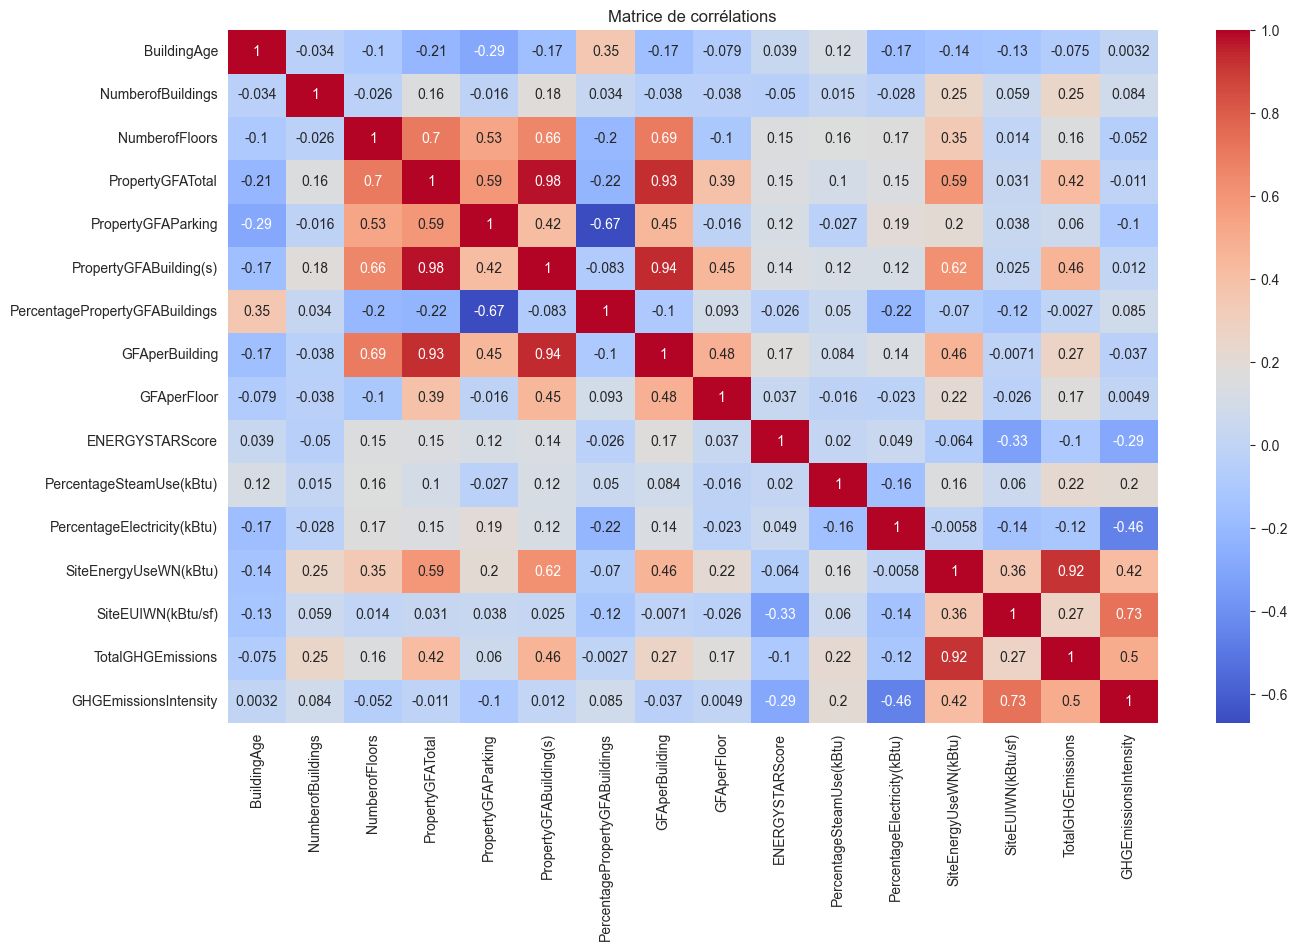

In [5]:
correl = data.drop(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFAPourcentage',
       'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFAPourcentage'], axis=1).corr()

plt.subplots(figsize=(15, 9))
sns.heatmap(correl, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélations')
plt.show()

# Préparation du dataset

## Initialisation des variables et classification de la cible

La variable cible qu'on cherche à calculer est SiteEnergyUseWN(kBtu).

In [6]:
y = data['SiteEnergyUseWN(kBtu)']

Je vais créer plusieurs DataFrames X_V... pour tester plusieurs ensembles de features et voir lequel performe le mieux.  
Les features toujours utilisées sont 'BuildingAge', 'NumberofBuildings', 'NumberofFloors', 'PercentageSteamUse(kBtu)' et 'PercentageElectricity(kBtu)'.  
Pour prendre en compte la surface de nos individus, nous avons 2 groupes de features différents :  
- 'PropertyGFAParking', 'GFAperBuilding'.  
- 'PropertyGFATotal', 'PercentagePropertyGFABuildings'.  

Nous aurons également 2 possibilités différentes pour le type de building :  
- 'PrimaryPropertyType'.  
- 'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFAPourcentage', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage'.  

Cela nous fait 4 X différents.  
Pour chacun de ces 4 X, nous aurons par défaut les features 'BuildingType' et 'Neighborhood' d'intégrés. Mais je vais également créer une version bis sans ces 2 features.  

V1 correspond au colonne de base avec 'PropertyGFAParking', 'GFAperBuilding' et seulement PrimaryPropertyType comme type de buildings.  
On fera un OneHotEncoding binaire classique sur ce dernier.

In [7]:
col_V1 = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'BuildingAge', 'NumberofBuildings', 'NumberofFloors',
            'PropertyGFAParking', 'GFAperBuilding', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)']
col_categ_V1 = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood']
X_V1 = data[col_V1]

Les colonnes bis sont les mêmes avec suppression de 'BuildingType' et 'Neighborhood'.

In [8]:
col_V1bis = ['PrimaryPropertyType', 'BuildingAge', 'NumberofBuildings', 'NumberofFloors',
            'PropertyGFAParking', 'GFAperBuilding', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)']
col_categ_V1bis = ['PrimaryPropertyType']
X_V1bis = data[col_V1bis]

V2 remplace ['PropertyGFAParking', 'GFAperBuilding'] par ['PropertyGFATotal', 'PercentagePropertyGFABuildings']

In [9]:
col_V2 = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'BuildingAge', 'PropertyGFATotal', 'NumberofBuildings', 'NumberofFloors',
            'PercentagePropertyGFABuildings', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)']
col_categ_V2 = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood']
X_V2 = data[col_V2]

In [10]:
col_V2bis = ['PrimaryPropertyType', 'BuildingAge', 'PropertyGFATotal', 'NumberofBuildings', 'NumberofFloors',
            'PercentagePropertyGFABuildings', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)']
col_categ_V2bis = ['PrimaryPropertyType']
X_V2bis = data[col_V2bis]

V3 correspond à V1 mais cette fois, on enlève PrimaryPropertyType et on remplace par l'ensemble des colonnes LargestPropertyType, SecondLargest, etc...  
On fera un OneHotEncoding plus "intelligent" en assignant la valeur du pourcentage de la superficie du type de batiment s'il est présent pour notre individu.  

In [11]:
col_V3 = [
    'BuildingType', 'LargestPropertyUseType',
    'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFAPourcentage', 'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFAPourcentage', 'Neighborhood', 'BuildingAge',
    'PropertyGFAParking', 'GFAperBuilding',
    'NumberofBuildings', 'NumberofFloors', 'PercentageSteamUse(kBtu)',
    'PercentageElectricity(kBtu)'
]

X_V3 = data[col_V3]
col_categ_V3 = ['BuildingType', 'Neighborhood']

In [12]:
col_V3bis = [
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage',
    'BuildingAge', 'PropertyGFAParking', 'GFAperBuilding',
    'NumberofBuildings', 'NumberofFloors', 'PercentageSteamUse(kBtu)',
    'PercentageElectricity(kBtu)'
]

X_V3bis = data[col_V3bis]

V4 correspond à V2 mais cette fois, on enlève PrimaryPropertyType et on remplace par l'ensemble des colonnes LargestPropertyType, SecondLargest, etc...  
On fera un OneHotEncoding plus "intelligent" en assignant la valeur du pourcentage de la superficie du type de batiment s'il est présent pour notre individu.  

In [13]:
col_V4 = [
    'BuildingType', 'LargestPropertyUseType', 
    'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFAPourcentage',  'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFAPourcentage', 'Neighborhood', 'BuildingAge',
    'PropertyGFATotal', 'PercentagePropertyGFABuildings',
    'NumberofBuildings', 'NumberofFloors', 'PercentageSteamUse(kBtu)',
    'PercentageElectricity(kBtu)'
]

X_V4 = data[col_V4]

col_categ_V4 = ['BuildingType', 'Neighborhood']

In [14]:
col_V4bis = [
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage',
    'BuildingAge', 'PropertyGFATotal', 
    'PercentagePropertyGFABuildings', 'NumberofBuildings', 'NumberofFloors',
    'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)'
]

X_V4bis = data[col_V4bis]

Ajout d'une colonne Bin_SiteEnergyUseWN qui permet de regrouper les valeurs de SiteEnergyUseWN(kBtu) en 10 quantiles afin de pouvoir faire un StratifiedKFold sur la donnée.

In [15]:
bins_SiteEnergyUseWN = pd.qcut(data['SiteEnergyUseWN(kBtu)'], q=10, labels=False, precision=0)
data['Bin_SiteEnergyUseWN'] = bins_SiteEnergyUseWN

y_class = data['Bin_SiteEnergyUseWN']

data


,BuildingType,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),PercentagePropertyGFABuildings,...,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFAPourcentage,ENERGYSTARScore,PercentageSteamUse(kBtu),PercentageElectricity(kBtu),SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,Bin_SiteEnergyUseWN
0,NonResidential,Hotel,DOWNTOWN,89,1,12,88434,0,88434,100.0,...,NaN,NaN,60.0,27.0,53.0,7.456910e+06,84.300003,249.98,2.83,7
1,NonResidential,Hotel,DOWNTOWN,20,1,11,103566,15064,88502,85.0,...,Restaurant,4.0,61.0,0.0,37.0,8.664479e+06,97.900002,295.86,2.86,7
2,NonResidential,Hotel,DOWNTOWN,47,1,41,956110,196718,759392,79.0,...,NaN,NaN,43.0,29.0,67.0,7.393711e+07,97.699997,2089.28,2.19,9
3,NonResidential,Hotel,DOWNTOWN,90,1,10,61320,0,61320,100.0,...,NaN,NaN,56.0,32.0,40.0,6.946800e+06,113.300003,286.43,4.67,7
4,NonResidential,Hotel,DOWNTOWN,36,1,18,175580,62000,113580,65.0,...,Swimming Pool,0.0,75.0,0.0,37.0,1.465650e+07,118.699997,505.01,2.88,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,Nonresidential COS,Other,DELRIDGE,34,1,1,18261,0,18261,100.0,...,NaN,NaN,NaN,0.0,62.0,1.025432e+06,56.200001,20.33,1.11,1
1522,Nonresidential COS,Other,DOWNTOWN,12,1,1,16000,0,16000,100.0,...,NaN,NaN,NaN,0.0,38.0,1.053706e+06,65.900002,32.17,2.01,1
1523,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,42,1,1,13157,0,13157,100.0,...,Swimming Pool,0.0,NaN,0.0,30.0,6.053764e+06,460.100006,223.54,16.99,6
1524,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,27,1,1,14101,0,14101,100.0,...,Pre-school/Daycare,3.0,NaN,0.0,45.0,7.828413e+05,55.500000,22.11,1.57,1


Création d'un Dataframe results qui stockera les scores de chacun des modèles.  
La colonne WithTransform correspondra au meilleur score après transformation sur les données (PowerTransformer, RobustScaler...) .

In [16]:
results = pd.DataFrame(columns=['V1', 'V2', 'V3', 'V4', 'WithTransform'], 
                       index=['DummyRegressor', 'LinearRegressor', 'Lasso', 'Ridge', 'ElasticNet', 
                              'XGBRegressor', 'GradientBoostingRegressor', 'RandomForest'])

## Encoding des variables catégorielles

OneHotEncoding simple via la fonction get_dummies de Pandas sur les colonnes catégorielles, à savoir ['BuildingType', 'PrimaryPropertyType', 'Neighborhood'] selon lesquelles sont présentes dans chaque version de X.

In [17]:
X_categ_V1 = pd.get_dummies(data[col_categ_V1]).astype(int)
X_V1 = pd.concat([X_V1.drop(columns=col_categ_V1), X_categ_V1], axis=1)

X_V1

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFAParking,GFAperBuilding,PercentageSteamUse(kBtu),PercentageElectricity(kBtu),BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,...,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,89,1,12,0,88434.0,27.0,53.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,20,1,11,15064,88502.0,0.0,37.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,47,1,41,196718,759392.0,29.0,67.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,90,1,10,0,61320.0,32.0,40.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,36,1,18,62000,113580.0,0.0,37.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,34,1,1,0,18261.0,0.0,62.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1522,12,1,1,0,16000.0,0.0,38.0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1523,42,1,1,0,13157.0,0.0,30.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1524,27,1,1,0,14101.0,0.0,45.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [18]:
X_categ_V1bis = pd.get_dummies(data[col_categ_V1bis]).astype(int)
X_V1bis = pd.concat([X_V1bis.drop(columns=col_categ_V1bis), X_categ_V1bis], axis=1)

In [19]:
X_categ_V2 = pd.get_dummies(data[col_categ_V2]).astype(int)
X_V2 = pd.concat([X_V2.drop(columns=col_categ_V2), X_categ_V2], axis=1)

X_categ_V2bis = pd.get_dummies(data[col_categ_V2bis]).astype(int)
X_V2bis = pd.concat([X_V2bis.drop(columns=col_categ_V2bis), X_categ_V2bis], axis=1)

In [20]:
X_categ_V3 = pd.get_dummies(data[col_categ_V3]).astype(int)
X_V3 = pd.concat([X_V3.drop(columns=col_categ_V3), X_categ_V3], axis=1)

In [21]:
X_categ_V4 = pd.get_dummies(data[col_categ_V4]).astype(int)
X_V4 = pd.concat([X_V4.drop(columns=col_categ_V4), X_categ_V4], axis=1)

Pour X_V3 et X_V4 :

Factorisation des différentes valeurs de 'LargestPropertyUseType', 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseType' pour n'avoir qu'au total environ 15/20 types différents et ainsi éviter les colonnes quasiment vide.  
J'ai tenté 2 façons de factoriser, je vais donc créer des copies de X_V3 et X_V4 pour comparer quelle est la meilleure méthode. Cette 2eme méthode sera suffixée d'un _B.

In [22]:
X_V3_B = X_V3.copy()
X_V3bis_B = X_V3bis.copy()
X_V4_B = X_V4.copy()
X_V4bis_B = X_V4bis.copy()

OneHotEncoding numéro 1 :  
Je regroupe les types proches sous un même nom et je mets certains types peu représentés et qui ne vont dans aucune autre catégorie dans Other.

In [23]:
for df in [X_V3, X_V3bis, X_V4, X_V4bis]:
    for i in ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
        for j in ['Financial Office', 'Medical Office']:
            df.loc[df[i]==j, i] = 'Office'
        for j in ['Convenience Store without Gas Station', 'Automobile Dealership', 'Repair Services (Vehicle, Shoe, Locksmith, etc)']:
            df.loc[df[i]==j, i] = 'Basic Store'
        for j in ['Strip Mall', 'Other - Mall', 'Enclosed Mall', 'Wholesale Club/Supercenter', 'Lifestyle Center']:
            df.loc[df[i]==j, i] = 'Mall'
        for j in ['Other - Restaurant/Bar', 'Fast Food Restaurant']:
            df.loc[df[i]==j, i] = 'Restaurant'
        for j in ['Other - Entertainment/Public Assembly', 'Social/Meeting Hall', 'Library', 'Museum', 'Performing Arts', 
                  'Other - Public Services', 'Fire Station', 'Police Station', 'Movie Theater', 'Courthouse']:
            df.loc[df[i]==j, i] = 'PublicSpaces'
        for j in ['Distribution Center', 'Refrigerated Warehouse', 'Manufacturing/Industrial Plant']:
            df.loc[df[i]==j, i] = 'Refrigerated Warehouse'
        for j in ['Non-Refrigerated Warehouse', 'Self-Storage Facility']:
            df.loc[df[i]==j, i] = 'Non-Refrigerated Warehouse'
        for j in ['Residence Hall/Dormitory', 'Senior Care Community', 'Multifamily Housing', 'Other - Lodging/Residential', 
                  'Prison/Incarceration', 'Residential Care Facility']:
            df.loc[df[i]==j, i] = 'EverydayLife'
        for j in ['Laboratory', 'Other - Technology/Science', 'Data Center']:
            df.loc[df[i]==j, i] = 'TechBuildings'
        for j in ['Other - Services', 'Other - Utility', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 
                  'Other/Specialty Hospital', 'Urgent Care/Clinic/Other Outpatient', 'Food Service', 
                  'Food Sales''Other - Education', 'Adult Education', 'Vocational School', 'Pre-school/Daycare', 
                  'Swimming Pool', 'Bank Branch', 'Other - Recreation', 'Fitness Center/Health Club/Gym', 'Bar/Nightclub']:
            df.loc[df[i]==j, i] = 'Other'
        

Je récupère les types uniques que nous avons et les mets dans une liste AllType.  
J'utilise cette liste pour créer autant de nouvelles colonnes dans notre DataFrame que de variable dans la liste. J'initialise le tout à 0.  
Ensuite je remplis en fonction des couples de colonnes [LargestPropertyUseType/LargestPropertyUseTypeGFAPourcentage]...

In [24]:
lst_1largest = X_V3['LargestPropertyUseType'].unique().tolist()
lst_2largest = X_V3['SecondLargestPropertyUseType'].dropna().unique().tolist()
lst_3largest = X_V3['ThirdLargestPropertyUseType'].dropna().unique().tolist()

AllType = list(set(lst_1largest+lst_2largest+lst_3largest))
        
for df in [X_V3, X_V3bis, X_V4, X_V4bis]:   
    for value in AllType:
        df[value]=0.0
    for index, row in df.iterrows():
        df.loc[index, row['LargestPropertyUseType']] = row['LargestPropertyUseTypeGFAPourcentage']
        if pd.notna(row['SecondLargestPropertyUseType']):
            df.loc[index, row['SecondLargestPropertyUseType']] = row['SecondLargestPropertyUseTypeGFAPourcentage']
        if pd.notna(row['ThirdLargestPropertyUseType']):
            df.loc[index, row['ThirdLargestPropertyUseType']] = row['ThirdLargestPropertyUseTypeGFAPourcentage']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

OneHotEncoding numéro 2 :  
Cette approche plus "simpliste" récupère les LargestPropertyUseType peu représentés et les mets automatiquement dans Other (sauf quelques exceptions).  
On se rapproche plus de la distribution du PrimaryPropertyType, avec beaucoup de données dans Other, ainsi on évite de faire des erreurs dans les autres types.  

In [25]:
LstLargestLower10 = data['LargestPropertyUseType'].value_counts()[data['LargestPropertyUseType'].value_counts()<10].index.tolist()

for dfbis in [X_V3_B, X_V3bis_B, X_V4_B, X_V4bis_B]:
    for i in ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
        for j in ['Wholesale Club/Supercenter']:
            dfbis.loc[dfbis[i]==j, i] = 'Supermarket/Grocery Store'
        for j in ['Other - Entertainment/Public Assembly', 'Other - Recreation']:
            dfbis.loc[dfbis[i]==j, i] = 'Other'
        for j in LstLargestLower10:
            dfbis.loc[dfbis[i]==j, i] = 'Other'

Pour l'attribution des pourcentages, la méthode reste la même.  
Ici j'ai une vérification en plus sur SecondLargestPropertyUseType et ThirdLargestPropertyUseType car je ne les ai pas pris en compte lors du choix de mes différent types.  

In [26]:
lst_1largest_bis = X_V3_B['LargestPropertyUseType'].unique().tolist()

for dfbis in [X_V3_B, X_V3bis_B, X_V4_B, X_V4bis_B]:
    for value in lst_1largest_bis:
        dfbis[value]=0.0
    for index, row in dfbis.iterrows():
        dfbis.loc[index, row['LargestPropertyUseType']] = row['LargestPropertyUseTypeGFAPourcentage']
        if pd.notna(row['SecondLargestPropertyUseType']):
            if row['SecondLargestPropertyUseType'] in lst_1largest_bis:
                dfbis.loc[index, row['SecondLargestPropertyUseType']] = row['SecondLargestPropertyUseTypeGFAPourcentage']
            else:
                dfbis.loc[index, 'Other'] = row['SecondLargestPropertyUseTypeGFAPourcentage']
        if pd.notna(row['ThirdLargestPropertyUseType']):
            if row['ThirdLargestPropertyUseType'] in lst_1largest_bis:
                dfbis.loc[index, row['ThirdLargestPropertyUseType']] = row['ThirdLargestPropertyUseTypeGFAPourcentage']
            else:
                dfbis.loc[index, 'Other'] = row['ThirdLargestPropertyUseTypeGFAPourcentage']

In [27]:
X_V3.loc[:,['LargestPropertyUseType',
            'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
           'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage', 'Hotel', 'Parking', 'Restaurant']]

,LargestPropertyUseType,LargestPropertyUseTypeGFAPourcentage,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFAPourcentage,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFAPourcentage,Hotel,Parking,Restaurant
0,Hotel,100.0,NaN,NaN,NaN,NaN,100.0,0.0,0.0
1,Hotel,81.0,Parking,15.0,Restaurant,4.0,81.0,15.0,4.0
2,Hotel,79.0,NaN,NaN,NaN,NaN,79.0,0.0,0.0
3,Hotel,100.0,NaN,NaN,NaN,NaN,100.0,0.0,0.0
4,Hotel,70.0,Parking,39.0,Other,0.0,70.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...
1521,Other,100.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1522,Other,100.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1523,Other,58.0,Other,42.0,Other,0.0,0.0,0.0,0.0
1524,Other,47.0,Other,46.0,Other,3.0,0.0,0.0,0.0


In [28]:
X_V4bis_B.loc[:, ['LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
                  'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage', 'Hotel', 'Parking', 'Restaurant']]

,LargestPropertyUseType,LargestPropertyUseTypeGFAPourcentage,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFAPourcentage,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFAPourcentage,Hotel,Parking,Restaurant
0,Hotel,100.0,NaN,NaN,NaN,NaN,100.0,0.0,0.0
1,Hotel,81.0,Parking,15.0,Restaurant,4.0,81.0,15.0,4.0
2,Hotel,79.0,NaN,NaN,NaN,NaN,79.0,0.0,0.0
3,Hotel,100.0,NaN,NaN,NaN,NaN,100.0,0.0,0.0
4,Hotel,70.0,Parking,39.0,Swimming Pool,0.0,70.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...
1521,Other,100.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1522,Other,100.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1523,Other,58.0,Other,42.0,Swimming Pool,0.0,0.0,0.0,0.0
1524,Other,47.0,Other,46.0,Other,3.0,0.0,0.0,0.0


Suppression des colonnes inutiles après le OneHotEncoding.

In [29]:
for alldf in [X_V3, X_V3bis, X_V4, X_V4bis, X_V3_B, X_V3bis_B, X_V4_B, X_V4bis_B]:
    alldf.drop(columns=[
        'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
        'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
        'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage'
    ], inplace=True)

# Modélisation

## Fonctions communes

Mise en place de certaines fonctions pour éviter de répéter le code inutilement.  

In [30]:
def affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae):
    print('Evaluation sur le training set :')
    print(f'List of possible accuracy: {lst_score_train}')
    print(f'Overall Accuracy: {mean(lst_score_train)}')
    print(f'Standard Deviation : {stdev(lst_score_train)}')

    print('\nEvaluation sur le testing set (R²):')
    print(f'List of possible accuracy: {lst_score_test}')
    print(f'Overall Accuracy: {mean(lst_score_test)}')
    print(f'Standard Deviation : {stdev(lst_score_test)}')
    
    
    print(f'\nList of RMSE: {lst_rmse}')
    print(f'Overall RMSE: {mean(lst_rmse)}')
    print(f'Standard Deviation RMSE: {stdev(lst_rmse)}')

    print(f'\nList of MAE: {lst_mae}')
    print(f'Overall MAE: {mean(lst_mae)}')
    print(f'Standard Deviation MAE: {stdev(lst_mae)}')

In [31]:
def modelisation(model, X):
    lst_score_train = []
    lst_score_test = []
    lst_rmse = []
    lst_mae = []

    # Create StratifiedKFold object.
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

    for train_index, test_index in skf.split(X, y_class):
        x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        model.fit(x_train_fold, y_train_fold)
        y_pred = model.predict(x_test_fold)

        #La fonction score retourne le coéfficient de détermination
        lst_score_train.append(model.score(x_train_fold, y_train_fold).round(4))
        lst_score_test.append(model.score(x_test_fold, y_test_fold).round(4))

        lst_rmse.append(mean_squared_error(y_test_fold, y_pred, squared=False).round(4))
        lst_mae.append(mean_absolute_error(y_test_fold, y_pred).round(4))
        
    return lst_score_train, lst_score_test, lst_rmse, lst_mae

In [32]:
#Fonction prise dans le cours pour afficher les résultats d'un GridSearch.

def resultizeGrid(grid):
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if "split" not in i]
    res = res[cols]
    res = res.sort_values('rank_test_score')
    
    return res

## Dummy

Premier modèle qui servira de base. On prend simplement la moyenne de la cible.

In [63]:
dr = DummyRegressor(strategy="mean")

lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(dr, X_V2bis)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['DummyRegressor', 'V2'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall Accuracy: 0.0
Standard Deviation : 0.0

Evaluation sur le testing set (R²):
List of possible accuracy: [-0.0006, -0.0007, -0.0333, -0.0003, -0.0082, -0.0015, -0.0057, -0.0047, -0.0037, -0.0]
Overall Accuracy: -0.00587
Standard Deviation : 0.010016769272907641

List of RMSE: [26058328.1398, 17116488.2188, 10428428.8221, 24351552.4504, 13830757.3672, 20061711.6546, 45524537.6769, 13320580.5236, 14124165.8652, 23217398.3246]
Overall RMSE: 20803394.90432
Standard Deviation RMSE: 10155303.156325195

List of MAE: [9661590.2667, 8617439.8439, 7438371.3801, 9346954.4179, 7908159.0248, 9758914.968, 11965091.4207, 8239209.7356, 8334275.4734, 9240551.9518]
Overall MAE: 9051055.84829
Standard Deviation MAE: 1280483.4270392095


Pour tous les modèles suivants, j'ai testé chacun de mes ensembles de features et gardé le meilleur pour X_V1, V2, etc... en testant plusieurs hyperparamètres.  
J'ai également fait un dernier test avec une transformation sur les features en entrée (RobustScaler ou PowerTransformer car ce sont les deux qui fonctionnent le mieux dans mon cas) et j'ai gardé seulement le meilleur score.  
Pour les tests avec GridSearchCV, la seule métrique utilisée pour calculer les performances sera le score intégré à chaque modèle par souci de simplicité.

## Linear Regression

### X_V1

In [64]:
lr = linear_model.LinearRegression()

lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(lr, X_V1bis)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['LinearRegressor', 'V1'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.4631, 0.4592, 0.4883, 0.5046, 0.4783, 0.448, 0.5859, 0.4786, 0.4833, 0.4454]
Overall Accuracy: 0.48347
Standard Deviation : 0.04044694879303835

Evaluation sur le testing set (R²):
List of possible accuracy: [0.5571, 0.7749, -0.1472, 0.2386, 0.4285, 0.8257, 0.2846, 0.4375, 0.2832, 0.7368]
Overall Accuracy: 0.44197000000000003
Standard Deviation : 0.2975690472627973

List of RMSE: [17336038.3064, 8117841.7165, 10988157.8474, 21244806.819, 10413599.8467, 8369177.0684, 38394846.1308, 9967001.4192, 11936040.3111, 11911369.1885]
Overall RMSE: 14867887.8654
Standard Deviation RMSE: 9215442.35201951

List of MAE: [5379453.9302, 4470978.9066, 4815974.1673, 5537254.6199, 4461242.6016, 4535465.1991, 7469822.1968, 4896786.9837, 5183876.5033, 4440144.3373]
Overall MAE: 5119099.94458
Standard Deviation MAE: 917029.281355008


### X_V2

In [65]:
lr = linear_model.LinearRegression()

lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(lr, X_V2bis)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['LinearRegressor', 'V2'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.479, 0.5047, 0.5235, 0.5549, 0.5171, 0.4894, 0.6326, 0.5171, 0.5231, 0.4866]
Overall Accuracy: 0.5228
Standard Deviation : 0.04450225961803639

Evaluation sur le testing set (R²):
List of possible accuracy: [0.7458, 0.6915, 0.1238, 0.1892, 0.4966, 0.8398, 0.3146, 0.5006, 0.316, 0.7644]
Overall Accuracy: 0.49823
Standard Deviation : 0.255776404306574

List of RMSE: [13134954.5982, 9502735.7083, 9603244.6006, 21923652.0137, 9773334.0751, 8023415.4547, 37582788.6847, 9391146.5422, 11659469.3521, 11270113.2636]
Overall RMSE: 14186485.42932
Standard Deviation RMSE: 9108272.955562642

List of MAE: [4839720.7859, 4867956.2152, 4464310.0117, 5593462.6441, 4238542.6836, 4299592.5419, 6964411.911, 4566306.8785, 5176643.7755, 4653879.8362]
Overall MAE: 4966482.72836
Standard Deviation MAE: 812365.9895699761


### X_V3

In [66]:
lr = linear_model.LinearRegression()

lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(lr, X_V3bis_B)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['LinearRegressor', 'V3'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.525, 0.4916, 0.504, 0.5444, 0.5229, 0.4759, 0.542, 0.5089, 0.4986, 0.4877]
Overall Accuracy: 0.5101
Standard Deviation : 0.02300845255311381

Evaluation sur le testing set (R²):
List of possible accuracy: [0.2944, 0.5576, 0.3285, 0.123, -0.3011, 0.8063, 0.2996, 0.2411, 0.5593, 0.601]
Overall Accuracy: 0.35097
Standard Deviation : 0.3075925734185112

List of RMSE: [21883138.7882, 11380223.2366, 8406716.9834, 22800426.7567, 15712007.3487, 8822268.1214, 37990758.2185, 11577169.9571, 9358983.6866, 14665426.6971]
Overall RMSE: 16259711.979430001
Standard Deviation RMSE: 9188306.204340763

List of MAE: [6421301.4866, 4738663.6805, 4505866.0482, 6326003.6699, 5231661.291, 4352299.0043, 7760789.5161, 5398833.2075, 4564520.3566, 4466318.3257]
Overall MAE: 5376625.65864
Standard Deviation MAE: 1125514.6318038597


### X_V4

In [67]:
lr = linear_model.LinearRegression()

lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(lr, X_V4bis_B)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['LinearRegressor', 'V4'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.5559, 0.554, 0.5661, 0.6202, 0.5839, 0.5424, 0.6086, 0.5705, 0.5636, 0.5486]
Overall Accuracy: 0.57138
Standard Deviation : 0.02563659710474678

Evaluation sur le testing set (R²):
List of possible accuracy: [0.5539, 0.6737, 0.3926, 0.0751, -0.2036, 0.8077, 0.3621, 0.3222, 0.5374, 0.6777]
Overall Accuracy: 0.41988
Standard Deviation : 0.3044662134147418

List of RMSE: [17399945.7743, 9773803.0697, 7995508.5709, 23415710.6773, 15111987.6733, 8791269.5665, 36257249.8352, 10941223.6588, 9588666.0793, 13180717.4205]
Overall RMSE: 15245608.23258
Standard Deviation RMSE: 8767707.549761666

List of MAE: [5815536.9839, 4904452.8165, 4516647.8799, 6509261.6778, 5264951.2443, 4568137.4059, 6999654.5095, 5387384.189, 4745277.9813, 4764318.5085]
Overall MAE: 5347562.3196600005
Standard Deviation MAE: 850068.7855518233


### Avec Transformation sur X_V2bis

In [68]:
pipeline = make_pipeline(StandardScaler(), linear_model.LinearRegression())


lst_score_train, lst_score_test, lst_rmse, lst_mae = modelisation(pipeline, X_V2bis)
    
affichage_metrics(lst_score_train, lst_score_test, lst_rmse, lst_mae)

results.at['LinearRegressor', 'WithTransform'] = mean(lst_score_test)

Evaluation sur le training set :
List of possible accuracy: [0.479, 0.5047, 0.5235, 0.5549, 0.5171, 0.4894, 0.6326, 0.517, 0.5231, 0.4866]
Overall Accuracy: 0.52279
Standard Deviation : 0.04450369397901458

Evaluation sur le testing set (R²):
List of possible accuracy: [0.7457, 0.6915, 0.1238, 0.1892, 0.4969, 0.8398, 0.3146, 0.5011, 0.316, 0.7643]
Overall Accuracy: 0.49829
Standard Deviation : 0.2557544588511063

List of RMSE: [13136301.305, 9503300.0868, 9603042.2436, 21923472.6878, 9770581.7893, 8024514.8604, 37582515.5037, 9386457.7941, 11659397.6148, 11272178.5474]
Overall RMSE: 14186176.24329
Standard Deviation RMSE: 9108408.607073296

List of MAE: [4841013.8052, 4865721.8922, 4464749.3652, 5593650.7008, 4239074.2634, 4303931.5766, 6963205.1619, 4568879.6195, 5175987.3392, 4654524.5786]
Overall MAE: 4967073.83026
Standard Deviation MAE: 811395.4795197853


## LassoRegression

### X_V1

In [69]:
params = {'alpha': np.logspace(-5, 5, 100)}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

LassoGrid = GridSearchCV(linear_model.Lasso(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
LassoGrid.fit(X_train, y_train)

best_params_Lasso = LassoGrid.best_params_
results.at['Lasso', 'V1'] = LassoGrid.best_score_

resultizeGrid(LassoGrid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
98,0.002105,0.001025,0.001302,0.000401,79248.289835,{'alpha': 79248.28983539186},0.498042,0.151951,1,0.512228,0.081049
97,0.003613,0.002114,0.001301,0.000400,62802.914418,{'alpha': 62802.914418342465},0.497889,0.154896,2,0.514268,0.081392
96,0.002910,0.000662,0.001000,0.000895,49770.235643,{'alpha': 49770.23564332114},0.497313,0.157488,3,0.515685,0.081704
99,0.002305,0.000247,0.001407,0.000585,100000.0,{'alpha': 100000.0},0.497268,0.147814,4,0.509266,0.080809
95,0.003508,0.000317,0.001102,0.000201,39442.060594,{'alpha': 39442.06059437648},0.496627,0.159490,5,0.516664,0.081916
...,...,...,...,...,...,...,...,...,...,...,...
4,0.021174,0.008813,0.001502,0.000448,0.000025,{'alpha': 2.5353644939701114e-05},0.490615,0.166952,96,0.518807,0.082328
3,0.017968,0.004139,0.002305,0.000403,0.00002,{'alpha': 2.0092330025650458e-05},0.490615,0.166952,97,0.518807,0.082328
2,0.016757,0.010047,0.001401,0.000491,0.000016,{'alpha': 1.5922827933410938e-05},0.490615,0.166952,98,0.518807,0.082328
1,0.027189,0.004368,0.002212,0.000407,0.000013,{'alpha': 1.2618568830660211e-05},0.490615,0.166952,99,0.518807,0.082328


### X_V2

In [70]:
params = {'alpha': np.logspace(-5, 5, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

LassoGrid = GridSearchCV(linear_model.Lasso(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
LassoGrid.fit(X_train, y_train)

best_params_Lasso = LassoGrid.best_params_
results.at['Lasso', 'V2'] = LassoGrid.best_score_

resultizeGrid(LassoGrid)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
189,0.003107,0.000375,0.001306,2.430868e-04,31440.354716,{'alpha': 31440.354715915},0.551821,0.144045,1,0.567305,0.095042
188,0.003207,0.000245,0.001603,4.913639e-04,28005.038942,{'alpha': 28005.038941836367},0.551804,0.144296,2,0.567564,0.095076
190,0.002910,0.000669,0.001604,4.866722e-04,35297.073027,{'alpha': 35297.07302730657},0.551802,0.143774,3,0.566989,0.094992
187,0.003811,0.000871,0.001502,6.336169e-04,24945.081352,{'alpha': 24945.081352303165},0.551743,0.144525,4,0.567780,0.095117
191,0.002813,0.000511,0.001104,4.879118e-04,39626.886387,{'alpha': 39626.88638701478},0.551739,0.143490,5,0.566603,0.094930
...,...,...,...,...,...,...,...,...,...,...,...
0,0.026874,0.001951,0.002412,8.072774e-04,0.00001,{'alpha': 1e-05},0.550306,0.146708,196,0.568815,0.095319
196,0.002403,0.000490,0.001001,3.504023e-07,70671.812739,{'alpha': 70671.81273927506},0.550023,0.141776,197,0.563197,0.094414
197,0.002805,0.000512,0.001108,5.868017e-04,79340.966658,{'alpha': 79340.96665797492},0.549040,0.141382,198,0.562072,0.094302
198,0.002912,0.000198,0.001001,4.672031e-07,89073.546386,{'alpha': 89073.54638610459},0.547623,0.140960,199,0.560744,0.094210


### X_V3

In [71]:
params = {'alpha': np.logspace(-4, 9, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

LassoGrid = GridSearchCV(linear_model.Lasso(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
LassoGrid.fit(X_train, y_train)

best_params_Lasso = LassoGrid.best_params_
results.at['Lasso', 'V3'] = LassoGrid.best_score_

resultizeGrid(LassoGrid)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
180,0.003207,0.000401,0.001805,0.000681,57384416.483024,{'alpha': 57384416.483024046},0.430469,0.210586,1,0.389116,0.045226
179,0.003307,0.000248,0.002213,0.000422,49370478.52839,{'alpha': 49370478.528390035},0.430415,0.204030,2,0.415987,0.038460
178,0.003813,0.000392,0.001504,0.000447,42475715.525369,{'alpha': 42475715.525369115},0.421831,0.192459,3,0.436749,0.033856
181,0.003808,0.000819,0.003116,0.002989,66699196.630301,{'alpha': 66699196.63030142},0.416461,0.206692,4,0.353642,0.054469
177,0.003409,0.000203,0.002006,0.000321,36543830.709573,{'alpha': 36543830.70957262},0.407905,0.181092,5,0.452780,0.031364
...,...,...,...,...,...,...,...,...,...,...,...
4,0.006919,0.001201,0.002103,0.000201,0.000183,{'alpha': 0.00018251834943190426},0.238880,0.294330,196,0.558914,0.033954
3,0.009626,0.002820,0.001802,0.000401,0.000157,{'alpha': 0.00015702901247293774},0.238880,0.294330,197,0.558914,0.033954
2,0.010827,0.006908,0.002211,0.000680,0.000135,{'alpha': 0.00013509935211980265},0.238880,0.294330,198,0.558914,0.033954
1,0.010933,0.005336,0.002205,0.000513,0.000116,{'alpha': 0.0001162322468679853},0.238880,0.294330,199,0.558914,0.033954


### X_V4

In [72]:
params = {'alpha': np.logspace(-4, 9, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

LassoGrid = GridSearchCV(linear_model.Lasso(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
LassoGrid.fit(X_train, y_train)

best_params_Lasso = LassoGrid.best_params_
results.at['Lasso', 'V4'] = LassoGrid.best_score_

resultizeGrid(LassoGrid)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
178,0.003409,0.000378,0.001405,0.000494,42475715.525369,{'alpha': 42475715.525369115},0.491691,0.139841,1,0.530026,0.060172
177,0.004112,0.001719,0.001909,0.000499,36543830.709573,{'alpha': 36543830.70957262},0.488405,0.144494,2,0.545619,0.057282
179,0.003208,0.000509,0.001706,0.000603,49370478.52839,{'alpha': 49370478.528390035},0.486728,0.134493,3,0.508960,0.064268
176,0.004016,0.000904,0.002004,0.000003,31440354.715915,{'alpha': 31440354.71591513},0.480009,0.149781,4,0.557198,0.055240
180,0.003519,0.000549,0.001602,0.000491,57384416.483024,{'alpha': 57384416.483024046},0.469572,0.127460,5,0.480868,0.070725
...,...,...,...,...,...,...,...,...,...,...,...
4,0.010155,0.004145,0.001704,0.000511,0.000183,{'alpha': 0.00018251834943190426},0.348912,0.274709,196,0.634311,0.051701
3,0.015858,0.007660,0.002003,0.000001,0.000157,{'alpha': 0.00015702901247293774},0.348912,0.274709,197,0.634311,0.051701
2,0.010030,0.006191,0.001903,0.000492,0.000135,{'alpha': 0.00013509935211980265},0.348912,0.274709,198,0.634311,0.051701
1,0.015673,0.011697,0.001803,0.000510,0.000116,{'alpha': 0.0001162322468679853},0.348912,0.274709,199,0.634311,0.051701


### Avec transformation sur X_V2bis

In [73]:
pipeline = Pipeline([
    ('scaler', PowerTransformer()),
    ('classifier', linear_model.Lasso(random_state=0))
])

params = {'classifier__alpha': np.logspace(-5, 9, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

LassoGrid = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
LassoGrid.fit(X_train, y_train)

best_params_Lasso = LassoGrid.best_params_
results.at['Lasso', 'WithTransform'] = LassoGrid.best_score_

resultizeGrid(LassoGrid)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
158,0.072386,0.001766,0.002809,0.000247,1304901.978014,{'classifier__alpha': 1304901.9780144016},0.369271,0.134280,1,0.393740,0.071312
157,0.078407,0.004676,0.003406,0.000665,1109752.496412,{'classifier__alpha': 1109752.4964120698},0.369262,0.138529,2,0.399157,0.071009
152,0.076417,0.005075,0.003311,0.000510,493704.785284,{'classifier__alpha': 493704.7852839004},0.369262,0.152170,3,0.417654,0.072776
151,0.076914,0.004899,0.003113,0.000590,419870.708444,{'classifier__alpha': 419870.70844439056},0.369074,0.154634,4,0.419960,0.072945
156,0.073002,0.003215,0.003415,0.000206,943787.827778,{'classifier__alpha': 943787.8277775391},0.368929,0.141741,5,0.403720,0.071475
...,...,...,...,...,...,...,...,...,...,...,...
175,0.079610,0.006361,0.004010,0.000448,20490746.898158,{'classifier__alpha': 20490746.89815846},-0.007467,0.007634,174,0.000000,0.000000
174,0.078101,0.004327,0.003308,0.000249,17426333.860096,{'classifier__alpha': 17426333.860096473},-0.007467,0.007634,174,0.000000,0.000000
173,0.073078,0.001944,0.003215,0.000512,14820207.057989,{'classifier__alpha': 14820207.0579886},-0.007467,0.007634,174,0.000000,0.000000
185,0.076138,0.002136,0.003020,0.001319,103532184.329566,{'classifier__alpha': 103532184.32956615},-0.007467,0.007634,174,0.000000,0.000000


## RidgeRegression

### X_V1

In [74]:
params = {'alpha': np.logspace(-5, 4, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

Ridge = GridSearchCV(linear_model.Ridge(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
Ridge.fit(X_train, y_train)

best_params_Ridge = Ridge.best_params_
results.at['Ridge', 'V1'] = Ridge.best_score_

resultizeGrid(Ridge)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
124,0.001904,0.000374,0.001103,0.000201,4.055461,{'alpha': 4.0554607358408274},0.527151,0.144517,1,0.497814,0.077801
123,0.002205,0.000247,0.001201,0.000981,3.654383,{'alpha': 3.6543830709572545},0.527090,0.143982,2,0.500515,0.078349
125,0.001906,0.000198,0.001006,0.000006,4.500558,{'alpha': 4.500557675700498},0.526857,0.145197,3,0.494832,0.077204
122,0.002108,0.000493,0.001007,0.000006,3.292971,{'alpha': 3.2929712550971546},0.526709,0.143613,4,0.502943,0.078849
126,0.002409,0.000375,0.001605,0.000487,4.994505,{'alpha': 4.99450511585514},0.526177,0.145997,5,0.491562,0.076560
...,...,...,...,...,...,...,...,...,...,...,...
195,0.001964,0.000164,0.000802,0.000678,6593.188271,{'alpha': 6593.188271333542},0.320995,0.120179,196,0.277096,0.037975
196,0.002002,0.000633,0.001103,0.000375,7316.807143,{'alpha': 7316.807143427207},0.319620,0.120543,197,0.275201,0.037866
197,0.001604,0.000737,0.001202,0.000401,8119.844993,{'alpha': 8119.844993184009},0.318373,0.120905,198,0.273398,0.037783
198,0.001904,0.000492,0.000901,0.000199,9011.018252,{'alpha': 9011.018251665037},0.317252,0.121265,199,0.271688,0.037722


### X_V2

In [75]:
params = {'alpha': np.logspace(-5, 4, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

Ridge = GridSearchCV(linear_model.Ridge(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
Ridge.fit(X_train, y_train)

best_params_Ridge = Ridge.best_params_
results.at['Ridge', 'V2'] = Ridge.best_score_

resultizeGrid(Ridge)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
117,0.002108,0.000377,0.001413,0.000482,1.956398,{'alpha': 1.9563983435170649},0.559982,0.141458,1,0.564024,0.094322
118,0.002003,0.000317,0.001303,0.000750,2.171118,{'alpha': 2.171117945694505},0.559944,0.141675,2,0.563186,0.094153
116,0.002205,0.000511,0.001907,0.000671,1.762914,{'alpha': 1.762914118095948},0.559897,0.141327,3,0.564752,0.094470
119,0.001909,0.000380,0.001405,0.000493,2.409404,{'alpha': 2.409403560239527},0.559761,0.141986,4,0.562227,0.093962
115,0.002409,0.000491,0.001313,0.000595,1.588565,{'alpha': 1.5885651294280527},0.559711,0.141273,5,0.565381,0.094598
...,...,...,...,...,...,...,...,...,...,...,...
195,0.002406,0.000377,0.001202,0.000400,6593.188271,{'alpha': 6593.188271333542},0.397330,0.149934,196,0.430520,0.070104
196,0.002105,0.000375,0.001303,0.000600,7316.807143,{'alpha': 7316.807143427207},0.396978,0.149178,197,0.429752,0.069904
197,0.002304,0.000402,0.001505,0.000444,8119.844993,{'alpha': 8119.844993184009},0.396690,0.148393,198,0.428989,0.069714
198,0.002008,0.000547,0.001004,0.000007,9011.018252,{'alpha': 9011.018251665037},0.396459,0.147584,199,0.428229,0.069534


### X_V3

In [76]:
params = {'alpha': np.logspace(-4, 7, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

Ridge = GridSearchCV(linear_model.Ridge(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
Ridge.fit(X_train, y_train)

best_params_Ridge = Ridge.best_params_
results.at['Ridge', 'V3'] = Ridge.best_score_

resultizeGrid(Ridge)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
165,0.002705,0.000678,0.001503,0.000317,132008.840083,{'alpha': 132008.84008314222},0.463914,0.191451,1,0.444658,0.041178
166,0.002806,0.001126,0.001401,0.000490,149926.843279,{'alpha': 149926.8432786047},0.463668,0.193538,2,0.435390,0.042035
164,0.002925,0.000408,0.001503,0.000448,116232.246868,{'alpha': 116232.24686798542},0.462737,0.188629,3,0.453478,0.040239
167,0.002403,0.000490,0.000922,0.000517,170276.917223,{'alpha': 170276.91722259048},0.462062,0.194859,4,0.425734,0.042786
163,0.002925,0.000213,0.001523,0.000471,102341.140211,{'alpha': 102341.14021054527},0.460109,0.185147,5,0.461799,0.039243
...,...,...,...,...,...,...,...,...,...,...,...
126,0.003007,0.000550,0.001812,0.000251,922.197882,{'alpha': 922.1978823334341},0.234474,0.295294,196,0.552549,0.031464
127,0.003208,0.000509,0.001605,0.000494,1047.370898,{'alpha': 1047.3708979594508},0.234219,0.294779,197,0.551648,0.031223
130,0.002715,0.000252,0.001705,0.000395,1534.368409,{'alpha': 1534.3684089300132},0.234176,0.292109,198,0.548568,0.030533
128,0.003307,0.000404,0.001805,0.000402,1189.534067,{'alpha': 1189.5340673703208},0.234060,0.294097,199,0.550679,0.030985


### X_V4

In [77]:
params = {'alpha': np.logspace(-4, 7, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

Ridge = GridSearchCV(linear_model.Ridge(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
Ridge.fit(X_train, y_train)

best_params_Ridge = Ridge.best_params_
results.at['Ridge', 'V4'] = Ridge.best_score_

resultizeGrid(Ridge)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
163,0.002804,0.000405,0.001801,2.512347e-04,102341.140211,{'alpha': 102341.14021054527},0.518886,0.132127,1,0.564903,0.059439
164,0.003005,0.000545,0.001301,5.056417e-04,116232.246868,{'alpha': 116232.24686798542},0.518652,0.131938,2,0.558095,0.060407
162,0.002810,0.000404,0.001001,5.309834e-07,90110.182517,{'alpha': 90110.18251665037},0.518040,0.132318,3,0.571341,0.058459
165,0.003302,0.000670,0.001405,3.755571e-04,132008.840083,{'alpha': 132008.84008314222},0.517369,0.131712,4,0.550954,0.061343
161,0.002803,0.000401,0.001105,4.889408e-04,79340.966658,{'alpha': 79340.96665797492},0.516112,0.132578,5,0.577380,0.057485
...,...,...,...,...,...,...,...,...,...,...,...
4,0.003717,0.001089,0.001404,4.884864e-04,0.000166,{'alpha': 0.0001663816886076129},0.348912,0.274709,196,0.634311,0.051701
3,0.003106,0.000668,0.001404,3.753930e-04,0.000146,{'alpha': 0.00014649713983072864},0.348912,0.274709,197,0.634311,0.051701
2,0.003136,0.000680,0.001168,9.199167e-04,0.000129,{'alpha': 0.0001289890261253308},0.348912,0.274709,198,0.634311,0.051701
1,0.003150,0.000628,0.001823,4.125007e-04,0.000114,{'alpha': 0.00011357333583431052},0.348912,0.274709,199,0.634311,0.051701


### Avec Transformation sur X_V2bis

In [78]:
pipeline = make_pipeline(RobustScaler(), linear_model.Ridge(random_state=0))

params = {'ridge__alpha': np.logspace(-5, 4, 200)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

Ridge = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
Ridge.fit(X_train, y_train)

best_params_Ridge = Ridge.best_params_
results.at['Ridge', 'WithTransform'] = Ridge.best_score_

resultizeGrid(Ridge)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
117,0.008131,0.000801,0.001503,0.000448,1.956398,{'ridge__alpha': 1.9563983435170649},0.560190,0.141487,1,0.564032,0.094323
118,0.007824,0.000404,0.001401,0.000490,2.171118,{'ridge__alpha': 2.171117945694505},0.560177,0.141704,2,0.563196,0.094154
116,0.008322,0.000678,0.001402,0.000375,1.762914,{'ridge__alpha': 1.762914118095948},0.560082,0.141356,3,0.564759,0.094471
119,0.009119,0.001207,0.001409,0.000590,2.409404,{'ridge__alpha': 2.409403560239527},0.560023,0.142013,4,0.562238,0.093963
115,0.008226,0.000513,0.001504,0.000446,1.588565,{'ridge__alpha': 1.5885651294280527},0.559876,0.141302,5,0.565387,0.094599
...,...,...,...,...,...,...,...,...,...,...,...
195,0.008748,0.000394,0.002013,0.000702,6593.188271,{'ridge__alpha': 6593.188271333542},0.355128,0.117761,196,0.314754,0.058343
196,0.008831,0.000811,0.001505,0.000445,7316.807143,{'ridge__alpha': 7316.807143427207},0.344445,0.116812,197,0.304813,0.056857
197,0.008118,0.000375,0.001702,0.000400,8119.844993,{'ridge__alpha': 8119.844993184009},0.333253,0.115570,198,0.294586,0.055330
198,0.011823,0.002948,0.001201,0.000400,9011.018252,{'ridge__alpha': 9011.018251665037},0.321614,0.114032,199,0.284119,0.053767


## ElasticNet

### X_V1

In [79]:
params = {'alpha': np.logspace(-3, 3, 10),
         'l1_ratio': np.arange(0, 1, 0.1)}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

ElasticNet = GridSearchCV(linear_model.ElasticNet(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
ElasticNet.fit(X_train, y_train)

best_params_ElasticNet = ElasticNet.best_params_
results.at['ElasticNet', 'V1'] = ElasticNet.best_score_

resultizeGrid(ElasticNet)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
12,0.011132,0.007248,0.002106,0.000665,0.004642,0.2,"{'alpha': 0.004641588833612777, 'l1_ratio': 0.2}",0.527177,0.144238,1,0.499179,0.078085
11,0.007028,0.000896,0.001404,0.000377,0.004642,0.1,"{'alpha': 0.004641588833612777, 'l1_ratio': 0.1}",0.527019,0.144941,2,0.495942,0.077435
28,0.011431,0.007852,0.001502,0.000634,0.021544,0.8,"{'alpha': 0.021544346900318832, 'l1_ratio': 0.8}",0.526900,0.145154,3,0.495030,0.077253
13,0.012936,0.006999,0.001807,0.000403,0.004642,0.3,"{'alpha': 0.004641588833612777, 'l1_ratio': 0....",0.526835,0.143684,4,0.502419,0.078748
10,0.028716,0.008653,0.002707,0.001635,0.004642,0.0,"{'alpha': 0.004641588833612777, 'l1_ratio': 0.0}",0.526473,0.145710,5,0.492737,0.076801
...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.002600,0.000208,0.001189,0.000226,1000.0,0.4,"{'alpha': 1000.0, 'l1_ratio': 0.4}",0.307806,0.130710,96,0.233760,0.032595
93,0.002703,0.000400,0.001504,0.000317,1000.0,0.3,"{'alpha': 1000.0, 'l1_ratio': 0.30000000000000...",0.307140,0.130799,97,0.232676,0.032446
92,0.003012,0.000554,0.001305,0.000607,1000.0,0.2,"{'alpha': 1000.0, 'l1_ratio': 0.2}",0.306530,0.130853,98,0.231751,0.032333
91,0.003110,0.000587,0.001805,0.000682,1000.0,0.1,"{'alpha': 1000.0, 'l1_ratio': 0.1}",0.305968,0.130881,99,0.230947,0.032245


### X_V2

In [80]:
params = {'alpha': np.logspace(-3, 3, 10),
         'l1_ratio': np.arange(0, 1, 0.1)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

ElasticNet = GridSearchCV(linear_model.ElasticNet(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
ElasticNet.fit(X_train, y_train)

best_params_ElasticNet = ElasticNet.best_params_
results.at['ElasticNet', 'V2'] = ElasticNet.best_score_

resultizeGrid(ElasticNet)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
16,0.010146,0.002457,0.001803,0.000243,0.004642,0.6,"{'alpha': 0.004641588833612777, 'l1_ratio': 0....",0.559988,0.141431,1,0.564138,0.094348
29,0.007616,0.000490,0.001504,0.000449,0.021544,0.9,"{'alpha': 0.021544346900318832, 'l1_ratio': 0.9}",0.559920,0.141750,2,0.562930,0.094105
15,0.006919,0.000969,0.001705,0.000246,0.004642,0.5,"{'alpha': 0.004641588833612777, 'l1_ratio': 0.5}",0.559775,0.141981,3,0.562232,0.093966
17,0.013645,0.003757,0.001404,0.000489,0.004642,0.7,"{'alpha': 0.004641588833612777, 'l1_ratio': 0....",0.559479,0.141283,4,0.565877,0.094702
14,0.006732,0.000822,0.001605,0.000582,0.004642,0.4,"{'alpha': 0.004641588833612777, 'l1_ratio': 0.4}",0.559037,0.142765,5,0.560230,0.093572
...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.002207,0.000402,0.001005,0.000315,1000.0,0.4,"{'alpha': 1000.0, 'l1_ratio': 0.4}",0.387764,0.131154,96,0.396110,0.061961
93,0.002708,0.000602,0.001102,0.000489,1000.0,0.3,"{'alpha': 1000.0, 'l1_ratio': 0.30000000000000...",0.387023,0.131000,97,0.395084,0.061759
92,0.002939,0.000583,0.001407,0.000588,1000.0,0.2,"{'alpha': 1000.0, 'l1_ratio': 0.2}",0.386344,0.130864,98,0.394201,0.061598
91,0.002977,0.000450,0.001201,0.000246,1000.0,0.1,"{'alpha': 1000.0, 'l1_ratio': 0.1}",0.385718,0.130743,99,0.393431,0.061468


### X_V3

In [81]:
params = {'alpha': np.logspace(-3, 3, 10),
         'l1_ratio': np.arange(0, 1, 0.1)}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

ElasticNet = GridSearchCV(linear_model.ElasticNet(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
ElasticNet.fit(X_train, y_train)

best_params_ElasticNet = ElasticNet.best_params_
results.at['ElasticNet', 'V3'] = ElasticNet.best_score_

resultizeGrid(ElasticNet)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
84,0.003289,0.000702,0.001201,0.000400,215.443469,0.4,"{'alpha': 215.44346900318823, 'l1_ratio': 0.4}",0.463959,0.191741,1,0.443523,0.041300
83,0.003557,0.000867,0.001405,0.000491,215.443469,0.3,"{'alpha': 215.44346900318823, 'l1_ratio': 0.30...",0.463277,0.194062,2,0.432184,0.042311
85,0.003933,0.000832,0.001101,0.000664,215.443469,0.5,"{'alpha': 215.44346900318823, 'l1_ratio': 0.5}",0.462080,0.187603,3,0.456091,0.039946
82,0.004114,0.000976,0.001606,0.000586,215.443469,0.2,"{'alpha': 215.44346900318823, 'l1_ratio': 0.2}",0.461101,0.195164,4,0.421927,0.043055
99,0.003508,0.000316,0.001606,0.000588,1000.0,0.9,"{'alpha': 1000.0, 'l1_ratio': 0.9}",0.460459,0.185528,5,0.460922,0.039361
...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.006019,0.000620,0.001704,0.000604,2.154435,0.6,"{'alpha': 2.154434690031882, 'l1_ratio': 0.600...",0.234546,0.295398,96,0.552758,0.031525
69,0.006120,0.000491,0.002005,0.000006,10.0,0.9,"{'alpha': 10.0, 'l1_ratio': 0.9}",0.234234,0.294823,97,0.551717,0.031244
53,0.005212,0.000982,0.001903,0.000491,2.154435,0.3,"{'alpha': 2.154434690031882, 'l1_ratio': 0.300...",0.234214,0.291919,98,0.548397,0.030504
55,0.007232,0.001129,0.002407,0.001159,2.154435,0.5,"{'alpha': 2.154434690031882, 'l1_ratio': 0.5}",0.234123,0.294455,99,0.551162,0.031104


### X_V4

In [82]:
params = {'alpha': np.logspace(-3, 4, 20),
         'l1_ratio': np.arange(0, 1, 0.1)}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

ElasticNet = GridSearchCV(linear_model.ElasticNet(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
ElasticNet.fit(X_train, y_train)

best_params_ElasticNet = ElasticNet.best_params_
results.at['ElasticNet', 'V4'] = ElasticNet.best_score_

resultizeGrid(ElasticNet)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
157,0.005135,0.000789,0.002005,0.000634,335.981829,0.7,"{'alpha': 335.9818286283781, 'l1_ratio': 0.700...",0.518926,0.132085,1,0.563767,0.059617
143,0.004408,0.000666,0.001509,0.000307,143.844989,0.3,"{'alpha': 143.8449888287663, 'l1_ratio': 0.300...",0.518926,0.132087,2,0.563821,0.059609
142,0.004715,0.000814,0.001804,0.000511,143.844989,0.2,"{'alpha': 143.8449888287663, 'l1_ratio': 0.2}",0.518473,0.131884,3,0.556610,0.060621
144,0.003907,0.000585,0.001606,0.000584,143.844989,0.4,"{'alpha': 143.8449888287663, 'l1_ratio': 0.4}",0.517974,0.132317,4,0.571644,0.058422
141,0.004613,0.000378,0.001904,0.000199,143.844989,0.1,"{'alpha': 143.8449888287663, 'l1_ratio': 0.1}",0.517122,0.131667,5,0.549952,0.061481
...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.014138,0.007923,0.002208,0.000814,0.001,0.6,"{'alpha': 0.001, 'l1_ratio': 0.6000000000000001}",0.348915,0.274707,196,0.634311,0.051701
7,0.012832,0.007439,0.002410,0.000665,0.001,0.7,"{'alpha': 0.001, 'l1_ratio': 0.7000000000000001}",0.348914,0.274708,197,0.634311,0.051701
19,0.019262,0.018149,0.002405,0.000488,0.002336,0.9,"{'alpha': 0.002335721469090121, 'l1_ratio': 0.9}",0.348913,0.274708,198,0.634311,0.051701
8,0.017458,0.008783,0.002203,0.000247,0.001,0.8,"{'alpha': 0.001, 'l1_ratio': 0.8}",0.348913,0.274708,199,0.634311,0.051701


### Avec Transformation sur X_V2bis

In [83]:
pipeline = make_pipeline(RobustScaler(), linear_model.ElasticNet(random_state=0))

params = {'elasticnet__alpha': np.logspace(-3, 3, 10),
         'elasticnet__l1_ratio': np.arange(0, 1, 0.1)}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

ElasticNet = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
ElasticNet.fit(X_train, y_train)

best_params_ElasticNet = ElasticNet.best_params_
results.at['ElasticNet', 'WithTransform'] = ElasticNet.best_score_

resultizeGrid(ElasticNet)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elasticnet__alpha,param_elasticnet__l1_ratio,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
16,0.014229,0.001945,0.001905,0.000200,0.004642,0.6,"{'elasticnet__alpha': 0.004641588833612777, 'e...",0.560192,0.141460,1,0.564147,0.094349
29,0.012015,0.001319,0.003408,0.003346,0.021544,0.9,"{'elasticnet__alpha': 0.021544346900318832, 'e...",0.560161,0.141778,2,0.562940,0.094106
15,0.014030,0.001381,0.001803,0.000678,0.004642,0.5,"{'elasticnet__alpha': 0.004641588833612777, 'e...",0.560036,0.142008,3,0.562244,0.093968
17,0.014831,0.001081,0.002007,0.000320,0.004642,0.7,"{'elasticnet__alpha': 0.004641588833612777, 'e...",0.559628,0.141311,4,0.565883,0.094703
14,0.014436,0.004293,0.001603,0.000374,0.004642,0.4,"{'elasticnet__alpha': 0.004641588833612777, 'e...",0.559356,0.142787,5,0.560245,0.093574
...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.008424,0.000585,0.001604,0.000376,1000.0,0.4,"{'elasticnet__alpha': 1000.0, 'elasticnet__l1_...",0.016651,0.013843,96,0.019558,0.005674
93,0.008723,0.000680,0.001505,0.000635,1000.0,0.3,"{'elasticnet__alpha': 1000.0, 'elasticnet__l1_...",0.013691,0.012635,97,0.017098,0.004971
92,0.009425,0.001021,0.002004,0.000637,1000.0,0.2,"{'elasticnet__alpha': 1000.0, 'elasticnet__l1_...",0.011384,0.011733,98,0.015193,0.004424
91,0.009181,0.000681,0.001608,0.000375,1000.0,0.1,"{'elasticnet__alpha': 1000.0, 'elasticnet__l1_...",0.009535,0.011042,99,0.013672,0.003985


## XGBRegressor

### X_V1

In [84]:
params = {
    'n_estimators': [100, 300],  # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'subsample': [0.9, 1.0],  # Fraction of samples used for each boosting round
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(xgb.XGBRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_
results.at['XGBRegressor', 'V1'] = XGBRegressor.best_score_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
17,0.057894,0.007108,0.004928,0.000560,0.8,0.2,4,100,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.643983,0.182298,1,0.986312,0.002397
19,0.153797,0.006764,0.006114,0.001990,0.8,0.2,4,300,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.642472,0.175532,2,0.997814,0.000581
15,0.123768,0.010972,0.005314,0.000934,0.8,0.2,3,300,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.609443,0.192706,3,0.992388,0.001755
13,0.045818,0.003756,0.004410,0.000861,0.8,0.2,3,100,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.607702,0.184277,4,0.972392,0.005193
44,0.084413,0.006891,0.004920,0.000376,1.0,0.2,5,100,0.9,"{'colsample_bytree': 1.0, 'learning_rate': 0.2...",0.606864,0.173250,5,0.995428,0.001124
18,0.168074,0.011651,0.006315,0.000927,0.8,0.2,4,300,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.605715,0.196893,6,0.998394,0.000307
9,0.071490,0.004929,0.005317,0.000932,0.8,0.1,5,100,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.604980,0.186528,7,0.983612,0.003536
16,0.061480,0.003196,0.004614,0.000492,0.8,0.2,4,100,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.604810,0.198688,8,0.987877,0.002320
23,0.216415,0.015626,0.006828,0.000597,0.8,0.2,5,300,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.603683,0.177291,9,0.999539,0.000106
21,0.075783,0.003967,0.005413,0.000735,0.8,0.2,5,100,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.603589,0.182552,10,0.993762,0.001126


### X_V2

In [85]:
params = {
    'n_estimators': [100, 300, 500],  # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'subsample': [0.9, 1.0],  # Fraction of samples used for each boosting round
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(xgb.XGBRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_
results.at['XGBRegressor', 'V2'] = XGBRegressor.best_score_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
41,0.188099,0.009259,0.005614,0.000488,1.0,0.1,3,500,1.0,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.640671,0.142768,1,0.987799,0.001923
27,0.142267,0.002559,0.005821,0.000517,0.8,0.2,4,300,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.640114,0.110739,2,0.997711,0.000553
29,0.234498,0.016167,0.006613,0.001020,0.8,0.2,4,500,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.639724,0.108850,3,0.999387,0.000179
39,0.116571,0.007267,0.004934,0.000570,1.0,0.1,3,300,1.0,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.638841,0.142699,4,0.978247,0.002564
25,0.051759,0.002223,0.005019,0.000636,0.8,0.2,4,100,1.0,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.636935,0.114194,5,0.986823,0.002578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,0.079114,0.008739,0.005416,0.000379,1.0,0.1,5,100,0.9,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.524419,0.074085,68,0.986758,0.002499
52,0.367548,0.015983,0.008521,0.001004,1.0,0.1,5,500,0.9,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.523137,0.067190,69,0.999572,0.000086
50,0.234500,0.017457,0.006114,0.000861,1.0,0.1,5,300,0.9,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.522749,0.068556,70,0.998117,0.000383
51,0.198333,0.003834,0.005815,0.000398,1.0,0.1,5,300,1.0,"{'colsample_bytree': 1.0, 'learning_rate': 0.1...",0.521828,0.093289,71,0.996788,0.001085


### X_V3

In [86]:
params = {
    'n_estimators': [100, 300, 500],  # Number of boosting rounds (trees)
    'max_depth': [4, 5, 6],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'subsample': [0.7, 0.8, 0.9],  # Fraction of samples used for each boosting round
    'colsample_bytree': [0.5, 0.6, 0.7],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(xgb.XGBRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_
results.at['XGBRegressor', 'V3'] = XGBRegressor.best_score_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
34,0.278735,0.008608,0.007013,0.001003,0.5,0.2,4,500,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.678597,0.129665,1,0.999496,9.133469e-05
31,0.226675,0.040536,0.007625,0.002727,0.5,0.2,4,300,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.678413,0.128864,2,0.997997,3.190475e-04
28,0.073400,0.015043,0.009636,0.008267,0.5,0.2,4,100,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.672989,0.129152,3,0.985805,1.630712e-03
35,0.305986,0.054144,0.008419,0.000969,0.5,0.2,4,500,0.9,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.671196,0.135780,4,0.999542,9.229195e-05
32,0.209797,0.051720,0.008038,0.002847,0.5,0.2,4,300,0.9,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.670501,0.137661,5,0.998180,4.080976e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.092320,0.014310,0.005711,0.000513,0.5,0.1,6,100,0.7,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.585096,0.114528,158,0.984724,1.441639e-03
45,0.114389,0.020698,0.006934,0.001462,0.5,0.2,6,100,0.7,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.583237,0.118987,159,0.995222,4.860932e-04
0,0.057236,0.003224,0.005010,0.000450,0.5,0.1,4,100,0.7,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.582741,0.097167,160,0.964636,3.601615e-03
48,0.298015,0.031445,0.007620,0.000373,0.5,0.2,6,300,0.7,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.581736,0.119928,161,0.999847,1.464513e-05


### X_V4

In [87]:
params = {
    'n_estimators': [100, 300, 500],  # Number of boosting rounds (trees)
    'max_depth': [2, 3, 4],  # Maximum depth of each tree
    'learning_rate': [0.2, 0.3, 0.4],  # Step size shrinkage to prevent overfitting
    'subsample': [0.7, 0.8, 0.9],  # Fraction of samples used for each boosting round
    'colsample_bytree': [0.4, 0.5, 0.6],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(xgb.XGBRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_
results.at['XGBRegressor', 'V4'] = XGBRegressor.best_score_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
121,0.129590,0.007531,0.005914,0.000584,0.5,0.3,3,300,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.3...",0.645679,0.141912,1,0.996312,0.000858
124,0.213010,0.014351,0.006326,0.001303,0.5,0.3,3,500,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.3...",0.645173,0.139311,2,0.998682,0.000258
118,0.052634,0.003470,0.004811,0.000240,0.5,0.3,3,100,0.8,"{'colsample_bytree': 0.5, 'learning_rate': 0.3...",0.635034,0.137920,3,0.983083,0.003309
98,0.206997,0.007995,0.006318,0.000240,0.5,0.2,3,500,0.9,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.627819,0.140809,4,0.997172,0.000638
95,0.136347,0.009267,0.005318,0.000402,0.5,0.2,3,300,0.9,"{'colsample_bytree': 0.5, 'learning_rate': 0.2...",0.627295,0.140931,5,0.993205,0.001725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.261184,0.017268,0.007824,0.001124,0.4,0.4,4,500,0.8,"{'colsample_bytree': 0.4, 'learning_rate': 0.4...",0.463011,0.200502,239,0.999912,0.000010
76,0.153841,0.002916,0.006016,0.000638,0.4,0.4,4,300,0.8,"{'colsample_bytree': 0.4, 'learning_rate': 0.4...",0.462212,0.202365,240,0.999374,0.000074
74,0.056454,0.001790,0.005927,0.002602,0.4,0.4,4,100,0.9,"{'colsample_bytree': 0.4, 'learning_rate': 0.4...",0.423271,0.271770,241,0.993834,0.001159
77,0.148108,0.003330,0.005515,0.000633,0.4,0.4,4,300,0.9,"{'colsample_bytree': 0.4, 'learning_rate': 0.4...",0.420835,0.275210,242,0.999490,0.000086


### Avec Transformation sur X_V4bis_B

In [33]:
pipeline = make_pipeline(PowerTransformer(), xgb.XGBRegressor(random_state=0))

params = {
    'xgbregressor__n_estimators': [300, 500, 700],  # Number of boosting rounds (trees)
    'xgbregressor__max_depth': [2, 3, 4, 5],  # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'xgbregressor__subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for each boosting round
    'xgbregressor__colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_
results.at['XGBRegressor', 'WithTransform'] = XGBRegressor.best_score_


resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
259,0.274258,0.008875,0.005508,0.000317,0.9,0.2,2,700,0.9,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.688981,0.130363,1,0.991578,1.631688e-03
256,0.224495,0.008527,0.006139,0.001072,0.9,0.2,2,500,0.9,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.688020,0.133345,2,0.988027,2.231687e-03
158,0.247212,0.007510,0.006719,0.001754,0.8,0.2,3,500,1.0,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.686594,0.153590,3,0.997680,5.100301e-04
155,0.168253,0.013719,0.005210,0.000399,0.8,0.2,3,300,1.0,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.685939,0.155774,4,0.994489,9.923269e-04
161,0.323184,0.018640,0.007422,0.001398,0.8,0.2,3,700,1.0,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.685790,0.152905,5,0.998827,2.905361e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.307227,0.025542,0.006525,0.000779,0.7,0.3,5,300,0.9,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.562406,0.144625,320,0.999961,8.486857e-06
103,0.495522,0.043957,0.008024,0.001590,0.7,0.3,5,500,0.9,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.562283,0.144377,321,0.999999,3.564571e-07
106,0.603423,0.052206,0.009737,0.001165,0.7,0.3,5,700,0.9,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.562260,0.144334,322,1.000000,1.656992e-08
201,0.350495,0.008134,0.007026,0.000547,0.8,0.3,4,500,0.8,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.561834,0.152155,323,0.999949,1.110015e-05


Analyse du temps d'exécution de ce modèle.

In [89]:
%%timeit
y_pred_time = XGBRegressor.best_estimator_.predict(X_V4bis_B)

4.03 ms ± 46.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Analyse de l'importance des features avec la fonction feature_importances_ de pandas et SHAP.

In [34]:
XGBest = XGBRegressor.best_estimator_
fi = pd.DataFrame({'feature':X_test.columns, 'importance':XGBest[1].feature_importances_})
fi.sort_values('importance', ascending=False)

,feature,importance
18,Hospital (General Medical & Surgical),0.281660
11,Office,0.227589
6,PercentageElectricity(kBtu),0.119119
1,PropertyGFATotal,0.110444
24,Laboratory,0.067960
3,NumberofBuildings,0.045932
4,NumberofFloors,0.024670
25,Supermarket/Grocery Store,0.016790
5,PercentageSteamUse(kBtu),0.016372
10,College/University,0.012365


On voit que certains types de batiments sont très impactants sur le calcul (Hospital, Office, Laboratory) alors que d'autres sont complètements négligeables. 
Les features les plus importantes sont PropertyGFATotal et PercentageElectricity(kBtu).

[17:28:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


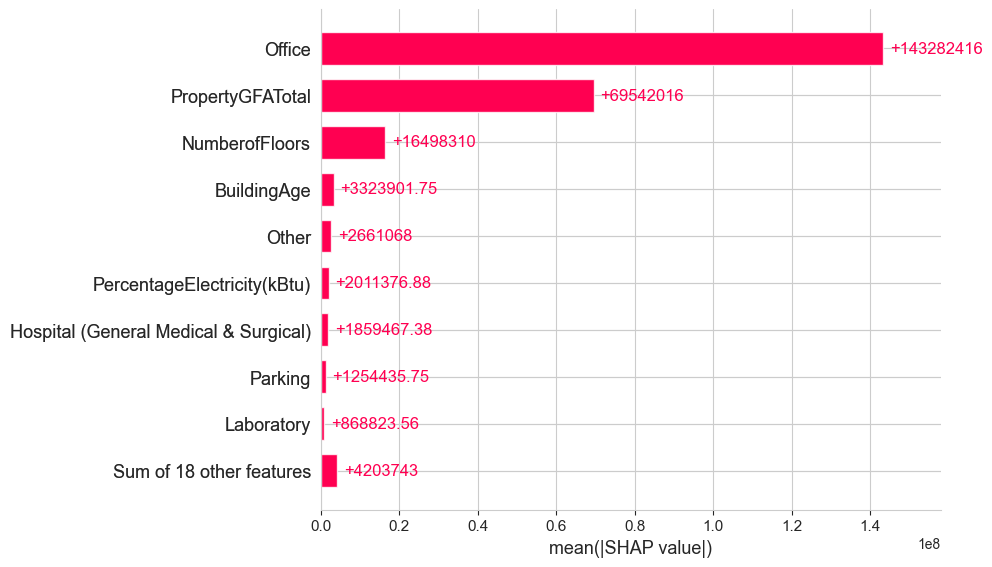

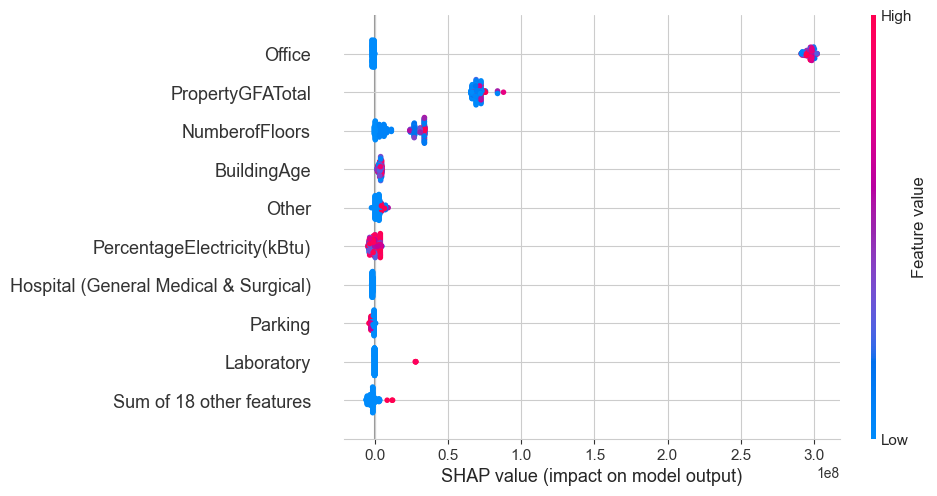

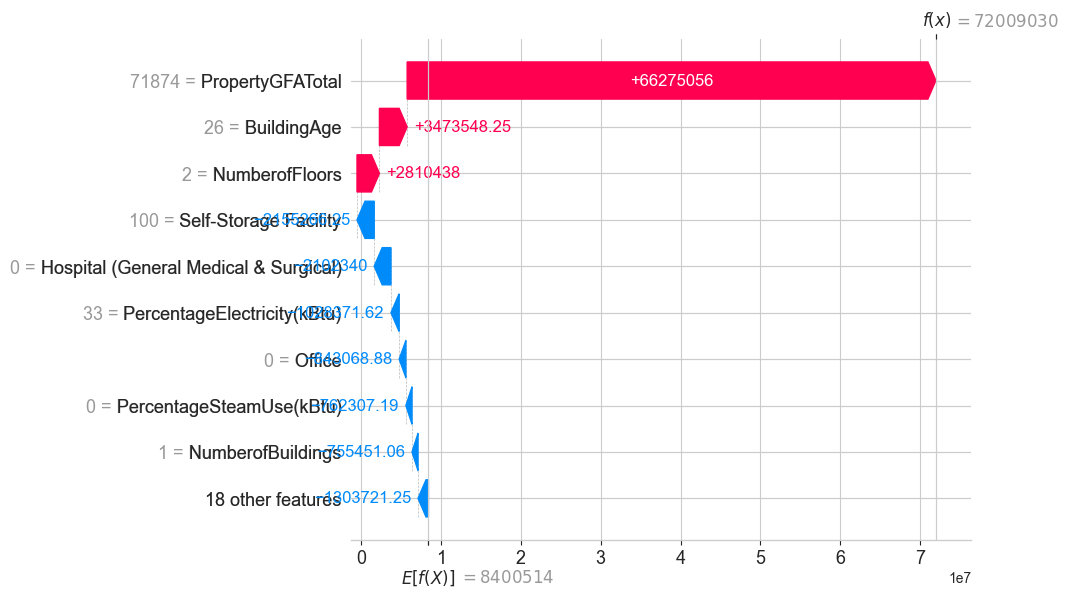

In [67]:
explainer = shap.TreeExplainer(XGBest.steps[1][1])
shap_values = explainer(X_test)

#print(shap_values2)
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)
shap.plots.waterfall(shap_values[150])

## GradientBoostingRegressor

### X_V1

In [92]:
params = {
    'n_estimators': [500, 700],  # Number of boosting stages (trees)
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [6, 7, 8],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

GradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
GradientBoostingRegressor.fit(X_train, y_train)

best_params_GradientBoostingRegressor = GradientBoostingRegressor.best_params_
results.at['GradientBoostingRegressor', 'V1'] = GradientBoostingRegressor.best_score_

resultizeGrid(GradientBoostingRegressor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,0.909513,0.042572,0.007121,0.001534,0.1,6,sqrt,700,"{'learning_rate': 0.1, 'max_depth': 6, 'max_fe...",0.664007,0.153781,1,0.999934,1.553103e-05
2,0.672335,0.022551,0.004514,0.000711,0.1,6,sqrt,500,"{'learning_rate': 0.1, 'max_depth': 6, 'max_fe...",0.663958,0.154171,2,0.999766,6.142834e-05
18,0.685424,0.041458,0.006114,0.000584,0.1,7,log2,500,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.659378,0.183330,3,0.999955,1.006617e-05
19,0.933617,0.029187,0.007420,0.000495,0.1,7,log2,700,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.659289,0.183161,4,0.999992,1.657390e-06
0,0.653529,0.021323,0.005212,0.000244,0.1,6,sqrt,500,"{'learning_rate': 0.1, 'max_depth': 6, 'max_fe...",0.655945,0.168085,5,0.999805,6.604647e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,1.263789,0.135435,0.008726,0.000395,0.1,8,sqrt,700,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.472234,0.460968,68,1.000000,1.052619e-07
36,0.672235,0.023579,0.005624,0.000492,0.2,6,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 6, 'max_fe...",0.470290,0.352225,69,0.999993,1.775021e-06
37,1.063860,0.174198,0.007627,0.000809,0.2,6,sqrt,700,"{'learning_rate': 0.2, 'max_depth': 6, 'max_fe...",0.470263,0.352144,70,0.999999,1.664371e-07
51,1.076060,0.044389,0.008128,0.000735,0.2,7,sqrt,700,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.431267,0.398575,71,1.000000,3.259883e-09


### X_V2

In [93]:
params = {
    'n_estimators': [300, 500, 700],  # Number of boosting stages (trees)
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [7, 8, 9],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

GradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
GradientBoostingRegressor.fit(X_train, y_train)

best_params_GradientBoostingRegressor = GradientBoostingRegressor.best_params_
results.at['GradientBoostingRegressor', 'V2'] = GradientBoostingRegressor.best_score_


resultizeGrid(GradientBoostingRegressor)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
30,0.470820,0.063479,0.005014,0.000453,0.1,8,log2,300,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.678454,0.173090,1,0.999867,4.268707e-05
31,0.837156,0.118565,0.009621,0.004077,0.1,8,log2,500,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.678184,0.173016,2,0.999991,3.206248e-06
32,1.096159,0.154120,0.009224,0.000510,0.1,8,log2,700,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.678129,0.172979,3,0.999999,3.143715e-07
24,0.570526,0.086233,0.005312,0.002382,0.1,8,sqrt,300,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.647183,0.114714,4,0.999877,2.798541e-05
25,0.931841,0.161707,0.007023,0.000460,0.1,8,sqrt,500,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.647159,0.114618,5,0.999991,3.016480e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.771973,0.028914,0.006013,0.000448,0.2,7,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.316638,0.380976,104,1.000000,1.019102e-07
59,1.023960,0.009531,0.007717,0.000246,0.2,7,sqrt,700,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.316632,0.380961,105,1.000000,2.425103e-09
93,0.609206,0.037924,0.006316,0.001510,0.2,9,sqrt,300,"{'learning_rate': 0.2, 'max_depth': 9, 'max_fe...",0.129268,0.577041,106,1.000000,5.879361e-09
94,1.008283,0.066966,0.008625,0.000968,0.2,9,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 9, 'max_fe...",0.129267,0.577043,107,1.000000,2.687269e-12


### X_V3

In [94]:
params = {
    'n_estimators': [300, 500, 700],  # Number of boosting stages (trees)
    'learning_rate': [0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'max_depth': [6, 7, 8],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal 
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis, y, test_size=0.15, random_state=15, stratify=y_class)

GradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
GradientBoostingRegressor.fit(X_train, y_train)

best_params_GradientBoostingRegressor = GradientBoostingRegressor.best_params_
results.at['GradientBoostingRegressor', 'V3'] = GradientBoostingRegressor.best_score_

resultizeGrid(GradientBoostingRegressor)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
63,0.403709,0.023567,0.004418,0.000381,0.3,6,log2,300,"{'learning_rate': 0.3, 'max_depth': 6, 'max_fe...",0.691697,0.145541,1,0.99999,3.016335e-06
65,0.992634,0.047965,0.007429,0.000967,0.3,6,log2,700,"{'learning_rate': 0.3, 'max_depth': 6, 'max_fe...",0.691678,0.145596,2,1.00000,3.745219e-09
64,0.669730,0.012015,0.005512,0.000450,0.3,6,log2,500,"{'learning_rate': 0.3, 'max_depth': 6, 'max_fe...",0.691668,0.145605,3,1.00000,1.112812e-07
101,1.264947,0.057342,0.009723,0.000399,0.3,8,log2,700,"{'learning_rate': 0.3, 'max_depth': 8, 'max_fe...",0.637156,0.190556,4,1.00000,0.000000e+00
100,0.938460,0.052797,0.007721,0.000515,0.3,8,log2,500,"{'learning_rate': 0.3, 'max_depth': 8, 'max_fe...",0.637156,0.190556,5,1.00000,1.212005e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.776822,0.025018,0.005428,0.000388,0.3,6,sqrt,500,"{'learning_rate': 0.3, 'max_depth': 6, 'max_fe...",0.411880,0.303606,104,1.00000,2.557489e-08
56,1.108798,0.052568,0.006517,0.000549,0.3,6,sqrt,700,"{'learning_rate': 0.3, 'max_depth': 6, 'max_fe...",0.411874,0.303610,105,1.00000,4.173863e-10
96,0.597046,0.026096,0.005113,0.000580,0.3,8,sqrt,300,"{'learning_rate': 0.3, 'max_depth': 8, 'max_fe...",0.357891,0.447174,106,1.00000,1.052182e-08
97,1.003688,0.052821,0.006316,0.000514,0.3,8,sqrt,500,"{'learning_rate': 0.3, 'max_depth': 8, 'max_fe...",0.357888,0.447171,107,1.00000,2.990933e-12


### X_V4

In [95]:
params = {
    'n_estimators': [500, 700],  # Number of boosting stages (trees)
    'learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [6, 7, 8],  # Maximum depth of each tree
    'min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal 
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

GradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
GradientBoostingRegressor.fit(X_train, y_train)

best_params_GradientBoostingRegressor = GradientBoostingRegressor.best_params_
results.at['GradientBoostingRegressor', 'V4'] = GradientBoostingRegressor.best_score_

resultizeGrid(GradientBoostingRegressor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
46,0.669625,0.023318,0.005316,0.000513,0.2,6,log2,500,"{'learning_rate': 0.2, 'max_depth': 6, 'max_fe...",0.642904,0.181626,1,0.999987,3.098960e-06
47,0.924349,0.053691,0.007225,0.000938,0.2,6,log2,700,"{'learning_rate': 0.2, 'max_depth': 6, 'max_fe...",0.642772,0.181634,2,0.999998,3.762855e-07
27,1.489310,0.214585,0.010424,0.004078,0.1,8,sqrt,700,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.642395,0.176835,3,1.000000,5.534813e-08
26,1.040075,0.146778,0.007619,0.001242,0.1,8,sqrt,500,"{'learning_rate': 0.1, 'max_depth': 8, 'max_fe...",0.642371,0.176884,4,0.999997,9.939066e-07
9,0.901495,0.035678,0.006826,0.000253,0.1,6,log2,700,"{'learning_rate': 0.1, 'max_depth': 6, 'max_fe...",0.642070,0.156457,5,0.999942,1.255115e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.845445,0.052098,0.006904,0.000742,0.2,8,log2,500,"{'learning_rate': 0.2, 'max_depth': 8, 'max_fe...",0.571398,0.160511,68,1.000000,8.104676e-09
16,0.874057,0.040406,0.006212,0.000982,0.1,7,sqrt,500,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.569231,0.219813,69,0.999965,9.415188e-06
17,1.253853,0.067304,0.008027,0.000708,0.1,7,sqrt,700,"{'learning_rate': 0.1, 'max_depth': 7, 'max_fe...",0.569081,0.219936,70,0.999995,1.594267e-06
50,0.855522,0.030427,0.006413,0.001805,0.2,7,sqrt,500,"{'learning_rate': 0.2, 'max_depth': 7, 'max_fe...",0.562578,0.181345,71,1.000000,4.018969e-08


### Avec Transformation sur X_V2

In [96]:
pipeline = make_pipeline(RobustScaler(), ensemble.GradientBoostingRegressor(random_state=0))

params = {
    'gradientboostingregressor__n_estimators': [500, 700],  # Number of boosting stages (trees)
    'gradientboostingregressor__learning_rate': [0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'gradientboostingregressor__max_depth': [6, 7, 8],  # Maximum depth of each tree
    'gradientboostingregressor__min_samples_split': [2, 3, 4],  # Minimum samples required to split an internal 
    'gradientboostingregressor__max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

GradientBoostingRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
GradientBoostingRegressor.fit(X_train, y_train)

best_params_GradientBoostingRegressor = GradientBoostingRegressor.best_params_
results.at['GradientBoostingRegressor', 'WithTransform'] = GradientBoostingRegressor.best_score_

resultizeGrid(GradientBoostingRegressor)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingregressor__learning_rate,param_gradientboostingregressor__max_depth,param_gradientboostingregressor__max_features,param_gradientboostingregressor__n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
32,0.753043,0.041834,0.008526,0.003527,0.1,8,log2,500,{'gradientboostingregressor__learning_rate': 0...,0.678161,0.171557,1,0.999991,3.206248e-06
33,1.073789,0.065470,0.010031,0.001378,0.1,8,log2,700,{'gradientboostingregressor__learning_rate': 0...,0.678110,0.171517,2,0.999999,3.143715e-07
44,0.633727,0.031898,0.005919,0.000744,0.2,6,log2,500,{'gradientboostingregressor__learning_rate': 0...,0.665030,0.172336,3,0.999970,5.881634e-06
45,0.849538,0.057873,0.006826,0.000403,0.2,6,log2,700,{'gradientboostingregressor__learning_rate': 0...,0.664948,0.172275,4,0.999995,1.291414e-06
2,0.652506,0.038738,0.005015,0.000844,0.1,6,sqrt,500,{'gradientboostingregressor__learning_rate': 0...,0.657054,0.167847,5,0.999722,5.410011e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,0.640709,0.032654,0.006316,0.001862,0.2,6,sqrt,500,{'gradientboostingregressor__learning_rate': 0...,0.428552,0.489562,68,0.999982,3.964724e-06
52,0.731418,0.042724,0.006614,0.000736,0.2,7,sqrt,500,{'gradientboostingregressor__learning_rate': 0...,0.425271,0.364863,69,0.999999,3.933343e-07
53,1.066360,0.063294,0.009326,0.001032,0.2,7,sqrt,700,{'gradientboostingregressor__learning_rate': 0...,0.425235,0.364850,70,1.000000,8.406588e-09
50,0.738249,0.030079,0.006018,0.000631,0.2,7,sqrt,500,{'gradientboostingregressor__learning_rate': 0...,0.317297,0.381721,71,1.000000,1.019102e-07


In [97]:
%%timeit
y_pred_time = GradientBoostingRegressor.best_estimator_.predict(X_V2bis)

17.7 ms ± 272 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [98]:
GradientBoostingRegressorBest = GradientBoostingRegressor.best_estimator_
fi = pd.DataFrame({'feature':X_test.columns, 'importance':GradientBoostingRegressorBest[1].feature_importances_})
fi.sort_values('importance', ascending=False)

,feature,importance
1,PropertyGFATotal,0.379594
8,PrimaryPropertyType_Hospital,0.133707
2,NumberofBuildings,0.111619
3,NumberofFloors,0.096576
6,PercentageElectricity(kBtu),0.089359
0,BuildingAge,0.087814
5,PercentageSteamUse(kBtu),0.028469
4,PercentagePropertyGFABuildings,0.016821
12,PrimaryPropertyType_Large Office,0.012632
15,PrimaryPropertyType_Other,0.010538


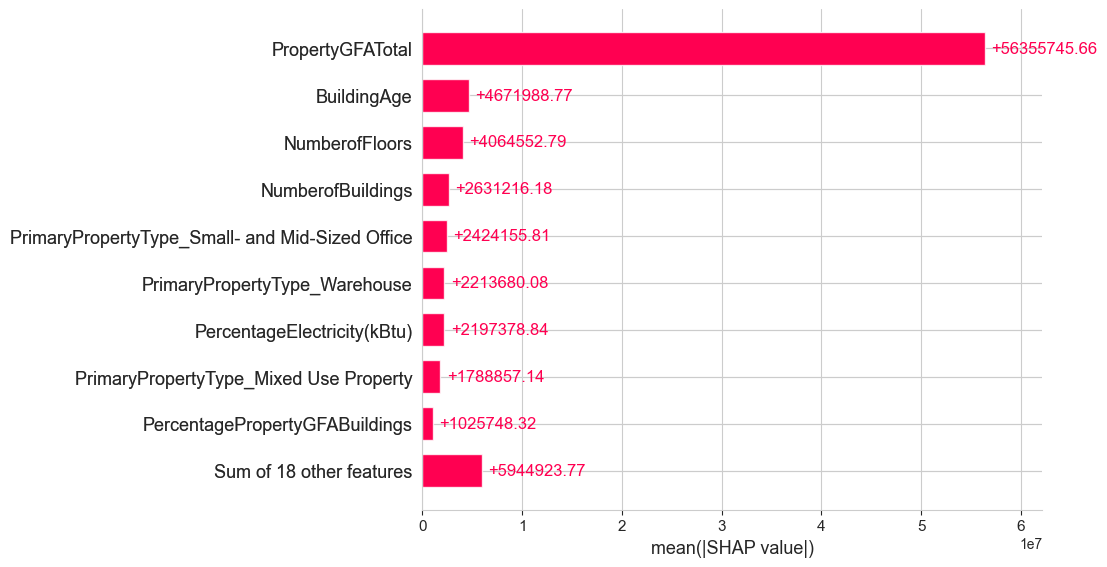

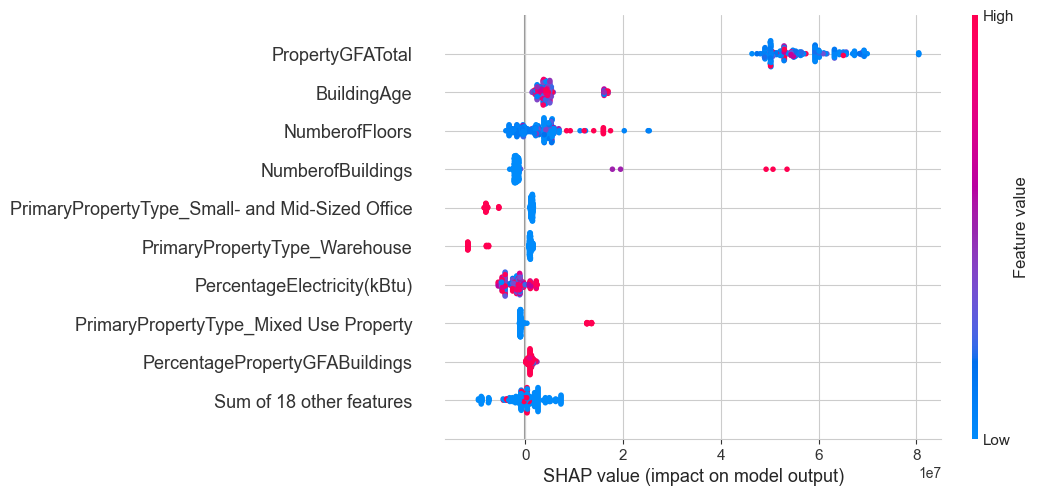

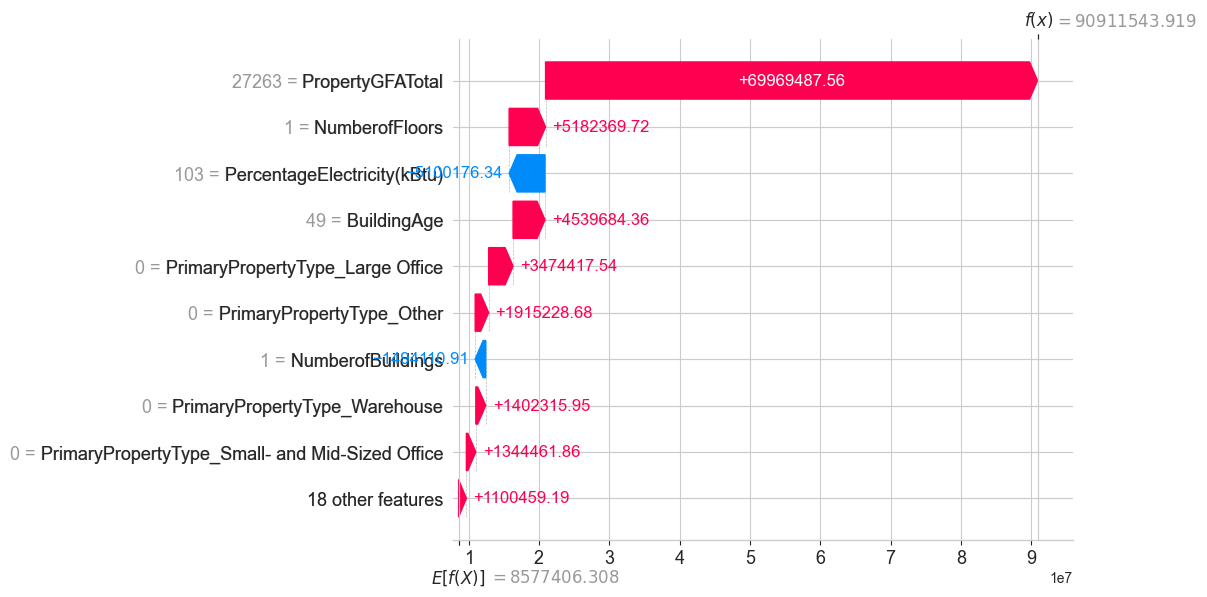

In [99]:
explainer2 = shap.TreeExplainer(GradientBoostingRegressorBest.steps[1][1])
shap_values2 = explainer2(X_test)

#print(shap_values2)
shap.plots.bar(shap_values2)
shap.plots.beeswarm(shap_values2)
shap.plots.waterfall(shap_values2[50])

## RandomForest

### X_V1

In [100]:
params = {
    'n_estimators': [100, 300],  # Number of trees in the forest
    'max_depth': [None, 3, 5, 7],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_samples':[0.7, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_V1bis, y, test_size=0.15, random_state=15, stratify=y_class)

RandomForestRegressor = GridSearchCV(ensemble.RandomForestRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
RandomForestRegressor.fit(X_train, y_train)

best_params_RandomForestRegressor = RandomForestRegressor.best_params_
results.at['RandomForest', 'V1'] = RandomForestRegressor.best_score_

resultizeGrid(RandomForestRegressor)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
6,0.464555,0.020333,0.011324,0.001249,None,sqrt,1.0,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.614634,0.172450,1,0.903359,0.022841
7,1.369495,0.080846,0.027988,0.002676,None,sqrt,1.0,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.612216,0.167715,2,0.922642,0.018580
19,1.263311,0.062837,0.028101,0.002077,None,log2,1.0,300,"{'max_depth': None, 'max_features': 'log2', 'm...",0.611091,0.168854,3,0.920336,0.017094
18,0.417547,0.023660,0.011130,0.000664,None,log2,1.0,100,"{'max_depth': None, 'max_features': 'log2', 'm...",0.600853,0.174979,4,0.904673,0.022960
1,1.156151,0.071797,0.026585,0.002343,None,sqrt,0.7,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.595496,0.163157,5,0.864191,0.027080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0.114673,0.004574,0.006414,0.000665,3,log2,0.7,100,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.397265,0.117005,92,0.482581,0.065921
41,0.368955,0.017899,0.015441,0.001973,3,log2,0.7,300,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.395471,0.120754,93,0.437622,0.054762
38,0.117336,0.008269,0.006318,0.000401,3,log2,0.7,100,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.390183,0.117771,94,0.451775,0.058628
46,0.124161,0.010114,0.005710,0.000604,3,log2,1.0,100,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.382775,0.117146,95,0.424030,0.061882


### X_V2

In [101]:
params = {
    'n_estimators': [50, 100, 300],  # Number of trees in the forest
    'max_depth': [None, 30, 50, 60],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_samples':[0.7, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

RandomForestRegressor = GridSearchCV(ensemble.RandomForestRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
RandomForestRegressor.fit(X_train, y_train)

best_params_RandomForestRegressor = RandomForestRegressor.best_params_
results.at['RandomForest', 'V2'] = RandomForestRegressor.best_score_

resultizeGrid(RandomForestRegressor)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
81,0.221888,0.013424,0.006114,0.001536,50,sqrt,1.0,50,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.651765,0.161321,1,0.920026,0.014500
9,0.220021,0.015687,0.006713,0.001084,None,sqrt,1.0,50,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.651765,0.161321,1,0.920026,0.014500
117,0.250053,0.030677,0.006524,0.001144,60,sqrt,1.0,50,"{'max_depth': 60, 'max_features': 'sqrt', 'max...",0.651765,0.161321,1,0.920026,0.014500
47,1.257683,0.027395,0.026560,0.001515,30,sqrt,1.0,300,"{'max_depth': 30, 'max_features': 'sqrt', 'max...",0.647621,0.164037,4,0.927614,0.018018
82,0.440833,0.020951,0.009928,0.000809,50,sqrt,1.0,100,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.641741,0.162045,5,0.909857,0.023958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.131165,0.010652,0.005017,0.000895,50,sqrt,0.7,50,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.559082,0.147342,138,0.686828,0.037555
60,0.113608,0.007307,0.005320,0.000519,30,log2,0.7,50,"{'max_depth': 30, 'max_features': 'log2', 'max...",0.551346,0.145126,141,0.676230,0.046702
24,0.115630,0.002979,0.004511,0.000445,None,log2,0.7,50,"{'max_depth': None, 'max_features': 'log2', 'm...",0.547958,0.141856,142,0.680846,0.042604
96,0.110901,0.005589,0.004913,0.000379,50,log2,0.7,50,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.547958,0.141856,142,0.680846,0.042604


### X_V3

In [102]:
params = {
    'n_estimators': [100, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 30, 50],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_samples':[0.7, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_V3bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

RandomForestRegressor = GridSearchCV(ensemble.RandomForestRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
RandomForestRegressor.fit(X_train, y_train)

best_params_RandomForestRegressor = RandomForestRegressor.best_params_
results.at['RandomForest', 'V3'] = RandomForestRegressor.best_score_

resultizeGrid(RandomForestRegressor)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
55,1.457291,0.066904,0.026971,0.001166,30,sqrt,1.0,300,"{'max_depth': 30, 'max_features': 'sqrt', 'max...",0.581589,0.165869,1,0.916726,0.019733
79,1.555277,0.087832,0.028477,0.002221,50,sqrt,1.0,300,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.576731,0.163953,2,0.917973,0.019904
7,1.479383,0.033036,0.028074,0.002374,None,sqrt,1.0,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.576722,0.163946,3,0.917976,0.019904
54,0.478247,0.011814,0.010528,0.000771,30,sqrt,1.0,100,"{'max_depth': 30, 'max_features': 'sqrt', 'max...",0.564602,0.174709,4,0.896579,0.023494
31,0.712065,0.014021,0.018964,0.002178,10,sqrt,1.0,300,"{'max_depth': 10, 'max_features': 'sqrt', 'max...",0.563865,0.161780,5,0.896447,0.016642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,0.209585,0.011647,0.008431,0.001793,10,log2,1.0,100,"{'max_depth': 10, 'max_features': 'log2', 'max...",0.492946,0.144270,92,0.742845,0.024887
64,0.263207,0.016677,0.008528,0.000775,30,log2,0.7,100,"{'max_depth': 30, 'max_features': 'log2', 'max...",0.491103,0.143438,93,0.708100,0.029607
16,0.253225,0.004673,0.008423,0.000378,None,log2,0.7,100,"{'max_depth': None, 'max_features': 'log2', 'm...",0.488790,0.144106,94,0.705805,0.027644
88,0.259784,0.018348,0.009320,0.001889,50,log2,0.7,100,"{'max_depth': 50, 'max_features': 'log2', 'max...",0.488790,0.144106,94,0.705805,0.027644


### X_V4

In [103]:
params = {
    'n_estimators': [100, 300],  # Number of trees in the forest
    'max_depth': [None, 3, 10, 30, 50],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_samples':[0.7, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_V4bis_B, y, test_size=0.15, random_state=15, stratify=y_class)

RandomForestRegressor = GridSearchCV(ensemble.RandomForestRegressor(random_state=0), params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
RandomForestRegressor.fit(X_train, y_train)

best_params_RandomForestRegressor = RandomForestRegressor.best_params_
results.at['RandomForest', 'V4'] = RandomForestRegressor.best_score_

resultizeGrid(RandomForestRegressor)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
79,1.686971,0.291381,0.028268,0.000601,30,sqrt,1.0,300,"{'max_depth': 30, 'max_features': 'sqrt', 'max...",0.599077,0.170127,1,0.920966,0.018277
103,1.460044,0.044048,0.027694,0.001838,50,sqrt,1.0,300,"{'max_depth': 50, 'max_features': 'sqrt', 'max...",0.599040,0.170864,2,0.921343,0.018651
7,1.490061,0.083905,0.028779,0.002706,None,sqrt,1.0,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.599040,0.170864,2,0.921343,0.018651
73,1.271717,0.177950,0.026381,0.003282,30,sqrt,0.7,300,"{'max_depth': 30, 'max_features': 'sqrt', 'max...",0.586633,0.165471,4,0.863715,0.027102
1,1.262552,0.063192,0.027381,0.002904,None,sqrt,0.7,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.581617,0.162294,5,0.863395,0.027053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0.372695,0.018938,0.014832,0.000877,3,log2,1.0,300,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.375728,0.110370,116,0.583495,0.026336
40,0.128105,0.011080,0.006914,0.001069,3,log2,0.7,100,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.374751,0.102468,117,0.564475,0.024096
44,0.127384,0.007391,0.006615,0.001070,3,log2,1.0,100,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.374143,0.115946,118,0.605384,0.030693
38,0.126025,0.007514,0.007117,0.001028,3,log2,0.7,100,"{'max_depth': 3, 'max_features': 'log2', 'max_...",0.374126,0.105891,119,0.581548,0.028118


### Avec Transformation sur X_V2

In [104]:
pipeline = make_pipeline(RobustScaler(), ensemble.RandomForestRegressor(random_state=0))

params = {
    'randomforestregressor__n_estimators': [100, 300],  # Number of trees in the forest
    'randomforestregressor__max_depth': [None, 10, 30, 50],  # Maximum depth of the trees
    'randomforestregressor__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'randomforestregressor__max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'randomforestregressor__max_samples':[0.7, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X_V2bis, y, test_size=0.15, random_state=15, stratify=y_class)

RandomForestRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
RandomForestRegressor.fit(X_train, y_train)

best_params_RandomForestRegressor = RandomForestRegressor.best_params_
results.at['RandomForest', 'WithTransform'] = RandomForestRegressor.best_score_

resultizeGrid(RandomForestRegressor)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__max_features,param_randomforestregressor__max_samples,param_randomforestregressor__n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
55,1.395359,0.129691,0.027676,0.001429,30,sqrt,1.0,300,"{'randomforestregressor__max_depth': 30, 'rand...",0.647806,0.163918,1,0.927616,0.018042
78,0.440657,0.018348,0.010433,0.000805,50,sqrt,1.0,100,"{'randomforestregressor__max_depth': 50, 'rand...",0.641564,0.161857,2,0.909714,0.024021
6,0.443303,0.022628,0.011925,0.002580,None,sqrt,1.0,100,"{'randomforestregressor__max_depth': None, 'ra...",0.641564,0.161857,2,0.909714,0.024021
79,1.314009,0.043410,0.026776,0.001252,50,sqrt,1.0,300,"{'randomforestregressor__max_depth': 50, 'rand...",0.640517,0.163684,4,0.927495,0.018034
7,1.326469,0.060850,0.028878,0.001171,None,sqrt,1.0,300,"{'randomforestregressor__max_depth': None, 'ra...",0.640517,0.163684,4,0.927495,0.018034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.645185,0.032696,0.020662,0.001073,50,log2,0.7,300,"{'randomforestregressor__max_depth': 50, 'rand...",0.560921,0.147528,92,0.673169,0.048440
17,0.637793,0.024622,0.021168,0.003304,None,log2,0.7,300,"{'randomforestregressor__max_depth': None, 'ra...",0.560921,0.147528,92,0.673169,0.048440
65,0.648050,0.022292,0.020758,0.001330,30,log2,0.7,300,"{'randomforestregressor__max_depth': 30, 'rand...",0.559498,0.147389,94,0.672876,0.049542
41,0.504304,0.018312,0.018161,0.001870,10,log2,0.7,300,"{'randomforestregressor__max_depth': 10, 'rand...",0.551698,0.150572,95,0.657462,0.045213


# RESULTS

Pour quasiment tous mes tests, nous avons un meilleur score sur les modèles "bis" ne comportant pas les features 'BuildingType' et 'Neighborhood'.  
On peut en conclure que ces 2 features sont inutiles à notre prédiction et les prendre en compte ne ferait qu'accentuer un potentiel problème d'overfitting.

In [105]:
results = results.apply(pd.to_numeric, errors='ignore')
results = results.round(3)
results

,V1,V2,V3,V4,WithTransform
DummyRegressor,NaN,-0.006,NaN,NaN,NaN
LinearRegressor,0.442,0.498,0.351,0.420,0.498
Lasso,0.498,0.552,0.430,0.492,0.369
Ridge,0.527,0.560,0.464,0.519,0.560
ElasticNet,0.527,0.560,0.464,0.519,0.560
XGBRegressor,0.644,0.641,0.679,0.646,0.689
GradientBoostingRegressor,0.664,0.678,0.692,0.643,0.678
RandomForest,0.615,0.652,0.582,0.599,0.648


On voit que les modèles type arbre de décision sont les plus performants.  
Les deux meilleurs semblent être XGBRegressor et GradientBoostingRegressor, avec une légère avance pour le premier.  
J'ai réalisé un test de temps de calcul entre les deux et c'est XGBRegressor qui est également le plus rapide.  
C'est donc ce dernier que nous allons choisir.  

Dans mon cas, les modèles qui utilisent la OneHotEncoding intelligent sont souvent moins performants que ceux qui utilise la version simplifiée.  
Par contre losqu'on applique une transformation sur les features, notament un PowerTransformer, le score des OneHotEncoding intelligent monte significativement contrairement aux modèles avec OneHotEncoding simplifié, passant parfois devant comme avec notre XGBRegressor.

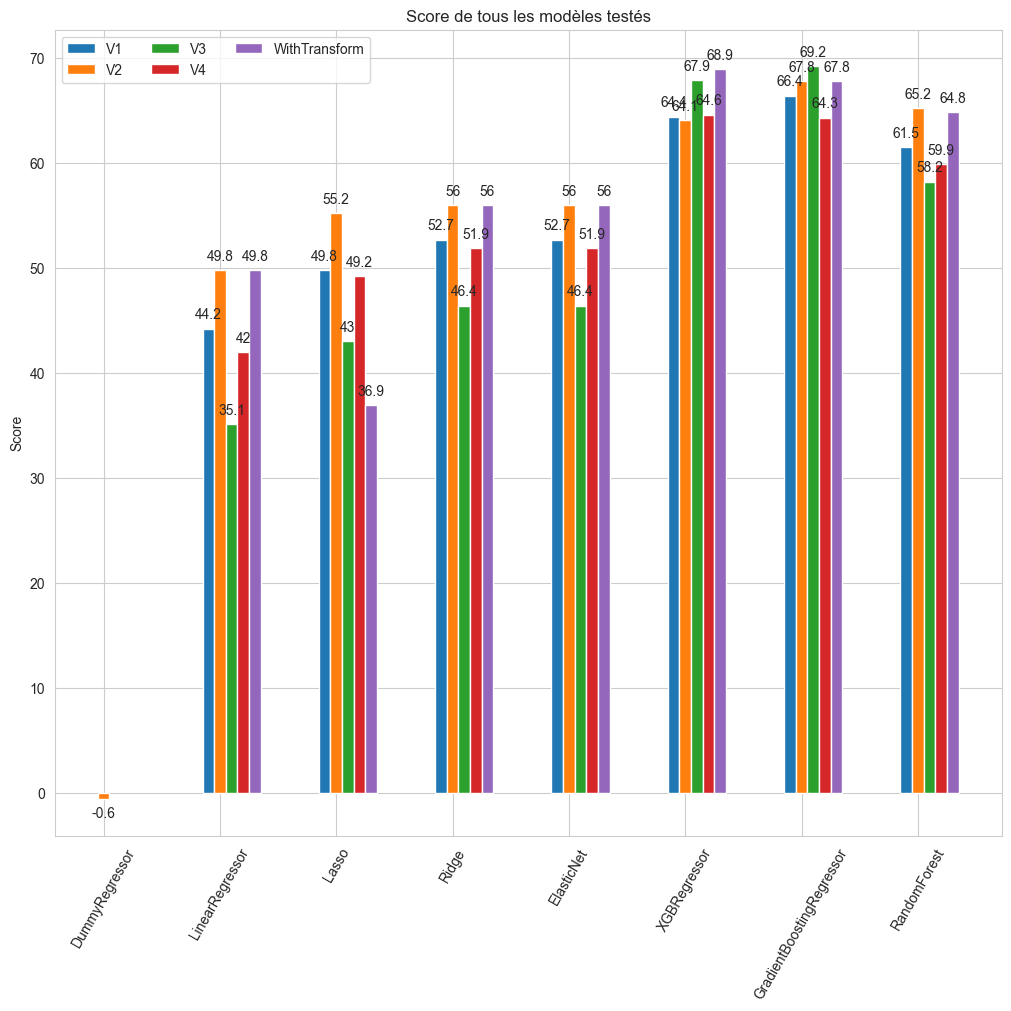

In [106]:
results_to_dict = (results*100).to_dict(orient='list')

x = np.arange(len(results.index))  # the label locations
width = 0.10  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10,10))

for attribute, measurement in results_to_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Score de tous les modèles testés')
ax.set_xticks(x + width, results.index, rotation=60)
ax.legend(loc='upper left', ncols=3)

plt.show()

# Energy Score

## Evaluation de l'Energy Score sans remplir les données manquantes

In [68]:
data_ESmissing = data[~pd.isna(data['ENERGYSTARScore'])].reset_index(drop=True)

col_ESmissing = [
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage',
    'BuildingAge', 'PropertyGFATotal', 
    'PercentagePropertyGFABuildings', 'NumberofBuildings', 'NumberofFloors',
    'ENERGYSTARScore', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)'
]

X_ESmissing = data_ESmissing[col_ESmissing]

y_ESmissing = data_ESmissing['SiteEnergyUseWN(kBtu)']


bins_SiteEnergyUseWNESmissing = pd.qcut(data_ESmissing['SiteEnergyUseWN(kBtu)'], q=10, labels=False, precision=0)
data_ESmissing['bins_SiteEnergyUseWNESmissing'] = bins_SiteEnergyUseWNESmissing

y_class_ESmissing = data_ESmissing['bins_SiteEnergyUseWNESmissing']



In [69]:
LstLargestLower10 = data['LargestPropertyUseType'].value_counts()[data['LargestPropertyUseType'].value_counts()<10].index.tolist()


for i in ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
    for j in ['Wholesale Club/Supercenter']:
        X_ESmissing.loc[X_ESmissing[i]==j, i] = 'Supermarket/Grocery Store'
    for j in ['Other - Entertainment/Public Assembly', 'Other - Recreation']:
        X_ESmissing.loc[X_ESmissing[i]==j, i] = 'Other'
    for j in LstLargestLower10:
        X_ESmissing.loc[X_ESmissing[i]==j, i] = 'Other'

In [70]:
lst_1largest_ES = X_ESmissing['LargestPropertyUseType'].unique().tolist()


for value in lst_1largest_ES:
    X_ESmissing[value]=0.0
for index, row in X_ESmissing.iterrows():
    X_ESmissing.loc[index, row['LargestPropertyUseType']] = row['LargestPropertyUseTypeGFAPourcentage']
    if pd.notna(row['SecondLargestPropertyUseType']):
        if row['SecondLargestPropertyUseType'] in lst_1largest_ES:
            X_ESmissing.loc[index, row['SecondLargestPropertyUseType']] = row['SecondLargestPropertyUseTypeGFAPourcentage']
        else:
            X_ESmissing.loc[index, 'Other'] = row['SecondLargestPropertyUseTypeGFAPourcentage']
    if pd.notna(row['ThirdLargestPropertyUseType']):
        if row['ThirdLargestPropertyUseType'] in lst_1largest_ES:
            X_ESmissing.loc[index, row['ThirdLargestPropertyUseType']] = row['ThirdLargestPropertyUseTypeGFAPourcentage']
        else:
            X_ESmissing.loc[index, 'Other'] = row['ThirdLargestPropertyUseTypeGFAPourcentage']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [71]:
X_ESmissing.drop(columns=[
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage'
], inplace=True)

Prédiction sans utiliser l'EnergyStarScore :

In [75]:
pipeline = make_pipeline(PowerTransformer(), xgb.XGBRegressor(random_state=0))

params = {
    'xgbregressor__n_estimators': [100, 300, 500],  # Number of boosting rounds (trees)
    'xgbregressor__max_depth': [2, 3, 4, 5],  # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'xgbregressor__subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for each boosting round
    'xgbregressor__colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_ESmissing.drop(columns=['ENERGYSTARScore']), y_ESmissing, test_size=0.15, random_state=15, stratify=y_class_ESmissing)

XGBRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
136,0.104125,0.008539,0.003905,0.000198,0.8,0.1,5,100,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.583309,0.136349,1,0.993907,1.208781e-03
119,0.084284,0.004679,0.004304,0.000981,0.8,0.1,3,100,1.0,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.583213,0.134120,2,0.981164,2.199291e-03
139,0.209562,0.005328,0.005006,0.000317,0.8,0.1,5,300,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.581950,0.137358,3,0.999615,4.785564e-05
142,0.334687,0.011146,0.005608,0.000490,0.8,0.1,5,500,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.580851,0.136681,4,0.999945,9.661043e-06
118,0.084972,0.002263,0.003603,0.000491,0.8,0.1,3,100,0.9,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.575940,0.135450,5,0.979653,3.407120e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.347534,0.013010,0.005618,0.000357,0.8,0.3,5,500,0.8,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.251164,0.377306,320,1.000000,4.258353e-09
42,0.165720,0.004776,0.004205,0.000510,0.7,0.2,2,500,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.242726,0.507454,321,0.995890,7.041777e-04
90,0.093647,0.007871,0.004007,0.000447,0.7,0.3,4,100,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.232512,0.337155,322,0.998112,3.830939e-04
96,0.254958,0.003714,0.004806,0.000243,0.7,0.3,4,500,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.230145,0.338295,323,0.999997,8.357045e-07


Prédiction en utilisant l'Energy Star Score :

In [74]:
pipeline = make_pipeline(PowerTransformer(), xgb.XGBRegressor(random_state=0))

params = {
    'xgbregressor__n_estimators': [100, 300, 500],  # Number of boosting rounds (trees)
    'xgbregressor__max_depth': [2, 3, 4, 5],  # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'xgbregressor__subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for each boosting round
    'xgbregressor__colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_ESmissing, y_ESmissing, test_size=0.15, random_state=15, stratify=y_class_ESmissing)

XGBRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
221,0.123460,0.004767,0.004005,0.000316,0.9,0.1,2,300,1.0,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.618142,0.151235,1,0.990573,5.027048e-04
224,0.162664,0.003459,0.004200,0.000252,0.9,0.1,2,500,1.0,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.616472,0.144636,2,0.995559,3.502690e-04
13,0.154551,0.014727,0.005119,0.001265,0.7,0.1,3,300,0.9,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.609719,0.147557,3,0.997947,3.181805e-04
16,0.220782,0.015039,0.004606,0.000374,0.7,0.1,3,500,0.9,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.608417,0.145624,4,0.999279,1.235015e-04
25,0.267665,0.014227,0.005208,0.000401,0.7,0.1,4,500,0.9,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.608096,0.138441,5,0.999886,2.352795e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.192649,0.015718,0.004606,0.000972,0.7,0.3,4,300,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.316199,0.491903,320,0.999986,3.786156e-06
90,0.096412,0.002257,0.003906,0.000374,0.7,0.3,4,100,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.310432,0.503022,321,0.999333,9.241172e-05
105,0.371641,0.008893,0.005707,0.000511,0.7,0.3,5,500,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.289158,0.479645,322,1.000000,4.127685e-10
102,0.234797,0.008899,0.005307,0.000247,0.7,0.3,5,300,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.289140,0.479724,323,1.000000,1.021689e-07


On a un score meilleur de 0.03 avec l'Energy Star Score.

## Remplissage des valeurs manquantes de Energy Score

In [86]:
dataToPredictES = data[['PrimaryPropertyType', 'BuildingAge', 'PropertyGFATotal', 'NumberofBuildings', 'NumberofFloors',
            'PercentagePropertyGFABuildings', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)', 'ENERGYSTARScore']]

categOHE = pd.get_dummies(dataToPredictES[['PrimaryPropertyType']]).astype(int)
dataToPredictES = pd.concat([dataToPredictES.drop(columns=['PrimaryPropertyType']), categOHE], axis=1)

Séparation du training et testing set en fonction du remplissage de la colonne ENERGYSTARScore.

In [87]:
data_withES = dataToPredictES[~pd.isna(data['ENERGYSTARScore'])]
data_noES = dataToPredictES[pd.isna(data['ENERGYSTARScore'])]

X_train_ES = data_withES.drop('ENERGYSTARScore', axis=1)
y_train_ES = data_withES['ENERGYSTARScore']

X_test_ES = data_noES.drop('ENERGYSTARScore', axis=1)
y_test_ES = data_noES['ENERGYSTARScore']

Calcul des meilleurs paramètres pour la prédiction.  

In [88]:
pipeline = make_pipeline(RobustScaler(), xgb.XGBRegressor(random_state=0))

params = {
    'xgbregressor__n_estimators': [30, 50, 100, 300],  # Number of boosting rounds (trees)
    'xgbregressor__max_depth': [2, 3, 4],  # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'xgbregressor__subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for each boosting round
    'xgbregressor__colsample_bytree': [0.4, 0.5, 0.6, 0.7],  # Fraction of features used for building each tree
}

XGBRegressor2 = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor2.fit(X_train_ES, y_train_ES)

resultizeGrid(XGBRegressor2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
112,0.027178,0.003504,0.002205,0.000248,0.5,0.1,2,50,0.9,"{'xgbregressor__colsample_bytree': 0.5, 'xgbre...",0.073207,0.040029,1,0.198548,0.010229
4,0.027514,0.006050,0.002307,0.000401,0.4,0.1,2,50,0.9,"{'xgbregressor__colsample_bytree': 0.4, 'xgbre...",0.069685,0.036433,2,0.190636,0.009798
240,0.025000,0.001508,0.002403,0.000971,0.6,0.1,4,30,0.8,"{'xgbregressor__colsample_bytree': 0.6, 'xgbre...",0.069431,0.025026,3,0.315281,0.008324
232,0.028790,0.001413,0.002915,0.000500,0.6,0.1,3,50,0.9,"{'xgbregressor__colsample_bytree': 0.6, 'xgbre...",0.068842,0.040067,4,0.297082,0.011187
132,0.029096,0.007427,0.003310,0.000681,0.5,0.1,4,30,0.8,"{'xgbregressor__colsample_bytree': 0.5, 'xgbre...",0.068316,0.022632,5,0.301130,0.006877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.118382,0.003563,0.003509,0.000451,0.5,0.3,4,300,0.9,"{'xgbregressor__colsample_bytree': 0.5, 'xgbre...",-0.290295,0.119899,428,0.964329,0.002117
431,0.105570,0.013084,0.002703,0.000749,0.7,0.3,4,300,1.0,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",-0.302588,0.141175,429,0.971476,0.005068
213,0.120999,0.002369,0.003308,0.000513,0.5,0.3,4,300,0.8,"{'xgbregressor__colsample_bytree': 0.5, 'xgbre...",-0.310618,0.105907,430,0.962142,0.003159
321,0.140889,0.027344,0.004122,0.000371,0.6,0.3,4,300,0.8,"{'xgbregressor__colsample_bytree': 0.6, 'xgbre...",-0.324403,0.102800,431,0.976004,0.002508


Application du meilleur modèle trouvé sur notre testing set, à savoir les individus sans ENERGYSTARScore.

In [89]:
y_test_ES = XGBRegressor2.predict(X_test_ES)

Création d'un nouveau DataFrame identique au premier mais en remplissant avec les nouvelles données précédemment prédites.

In [90]:
dataWithESFull = data.copy()
cpt=0
for x in dataWithESFull[pd.isna(data['ENERGYSTARScore'])].index:
    dataWithESFull.loc[x, 'ENERGYSTARScore'] = y_test_ES[cpt]
    cpt=cpt+1

## Utilisation de Energy Score avec les valeurs prédites

In [96]:
col_WithESbest = [
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage',
    'BuildingAge', 'PropertyGFATotal', 
    'PercentagePropertyGFABuildings', 'NumberofBuildings', 'NumberofFloors',
    'ENERGYSTARScore', 'PercentageSteamUse(kBtu)', 'PercentageElectricity(kBtu)'
]

X_WithESbest = dataWithESFull[col_WithESbest]

In [97]:
LstLargestLower10 = dataWithESFull['LargestPropertyUseType'].value_counts()[dataWithESFull['LargestPropertyUseType'].value_counts()<10].index.tolist()


for i in ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
    for j in ['Wholesale Club/Supercenter']:
        X_WithESbest.loc[X_WithESbest[i]==j, i] = 'Supermarket/Grocery Store'
    for j in ['Other - Entertainment/Public Assembly', 'Other - Recreation']:
        X_WithESbest.loc[X_WithESbest[i]==j, i] = 'Other'
    for j in LstLargestLower10:
        X_WithESbest.loc[X_WithESbest[i]==j, i] = 'Other'

In [98]:
lst_1largest_ES = X_WithESbest['LargestPropertyUseType'].unique().tolist()


for value in lst_1largest_ES:
    X_WithESbest[value]=0.0
for index, row in X_WithESbest.iterrows():
    X_WithESbest.loc[index, row['LargestPropertyUseType']] = row['LargestPropertyUseTypeGFAPourcentage']
    if pd.notna(row['SecondLargestPropertyUseType']):
        if row['SecondLargestPropertyUseType'] in lst_1largest_ES:
            X_WithESbest.loc[index, row['SecondLargestPropertyUseType']] = row['SecondLargestPropertyUseTypeGFAPourcentage']
        else:
            X_WithESbest.loc[index, 'Other'] = row['SecondLargestPropertyUseTypeGFAPourcentage']
    if pd.notna(row['ThirdLargestPropertyUseType']):
        if row['ThirdLargestPropertyUseType'] in lst_1largest_ES:
            X_WithESbest.loc[index, row['ThirdLargestPropertyUseType']] = row['ThirdLargestPropertyUseTypeGFAPourcentage']
        else:
            X_WithESbest.loc[index, 'Other'] = row['ThirdLargestPropertyUseTypeGFAPourcentage']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [99]:
X_WithESbest.drop(columns=[
    'LargestPropertyUseType', 'LargestPropertyUseTypeGFAPourcentage',
    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFAPourcentage',
    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFAPourcentage'
], inplace=True)

In [100]:
pipeline = make_pipeline(PowerTransformer(), xgb.XGBRegressor(random_state=0))

params = {
    'xgbregressor__n_estimators': [300, 500, 700, 1000],  # Number of boosting rounds (trees)
    'xgbregressor__max_depth': [2, 3, 4, 5],  # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage to prevent overfitting
    'xgbregressor__subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for each boosting round
    'xgbregressor__colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features used for building each tree
}

X_train, X_test, y_train, y_test = train_test_split(X_WithESbest, y, test_size=0.15, random_state=15, stratify=y_class)

XGBRegressor = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, return_train_score=True,verbose=1)
XGBRegressor.fit(X_train, y_train)

best_params_XGBRegressor = XGBRegressor.best_params_

resultizeGrid(XGBRegressor)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,param_xgbregressor__subsample,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
14,0.377472,0.017796,0.006422,0.000388,0.7,0.1,2,1000,0.9,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.696129,0.125010,1,0.991254,1.937676e-03
10,0.267941,0.008328,0.005409,0.000586,0.7,0.1,2,700,0.9,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.693244,0.127913,2,0.986698,2.845443e-03
6,0.253330,0.037336,0.006813,0.001082,0.7,0.1,2,500,0.9,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.688563,0.133454,3,0.981043,3.758109e-03
13,0.445865,0.057007,0.007225,0.002018,0.7,0.1,2,1000,0.8,"{'xgbregressor__colsample_bytree': 0.7, 'xgbre...",0.683791,0.118901,4,0.991487,1.753058e-03
205,0.384167,0.047892,0.006218,0.000686,0.8,0.1,2,1000,0.8,"{'xgbregressor__colsample_bytree': 0.8, 'xgbre...",0.681737,0.127833,5,0.991744,1.637886e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,1.061997,0.108633,0.011741,0.001543,0.9,0.2,5,1000,0.7,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.522855,0.074375,572,1.000000,1.995125e-09
568,0.702783,0.014651,0.008527,0.000632,0.9,0.3,5,700,0.7,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.461478,0.098652,573,1.000000,1.479012e-09
572,1.021639,0.054732,0.012242,0.001584,0.9,0.3,5,1000,0.7,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.461475,0.098655,574,1.000000,5.503465e-12
564,0.528635,0.022119,0.007824,0.001599,0.9,0.3,5,500,0.7,"{'xgbregressor__colsample_bytree': 0.9, 'xgbre...",0.461468,0.098686,575,1.000000,5.227351e-08


In [101]:
BestXGB = XGBRegressor.best_estimator_

fi = pd.DataFrame({'feature':X_WithESbest.columns, 'importance':BestXGB[1].feature_importances_})
fi.sort_values('importance', ascending=False)

,feature,importance
3,NumberofBuildings,0.253459
19,Hospital (General Medical & Surgical),0.180333
12,Office,0.179431
1,PropertyGFATotal,0.090120
7,PercentageElectricity(kBtu),0.076330
25,Laboratory,0.059672
5,ENERGYSTARScore,0.038551
4,NumberofFloors,0.031163
14,Non-Refrigerated Warehouse,0.022029
26,Supermarket/Grocery Store,0.012334


L'ENEGYSTARSCORE est assez peu impactant ici. Son utilisation à tout de même augmenter notre score, passant de 0.687 à 0.696.  
La différence est moindre que quand on a comparé sans remplir les données. C'est assez logique car mon remplissage était peu efficace, si on veut réellement utiliser cette feature il faut mieux l'évaluer.  

On peut en conclure que si on veut la meilleure prédiction possible pour la consommation d'énergie, il est préférable d'utiliser la feature ENERGYSTARScore.  
Cependant la différence reste légère et si le calcul de cette variable est réellement fastidieux, je pense que nous pouvons nous en passer.